#  Análisis Predictivo para la Toma de Decisiones Estratégicas en RRHH  


👤 **Autor:** John Leonardo Vargas Mesa  
🔗 [LinkedIn](https://www.linkedin.com/in/leonardovargas/) | [GitHub](https://github.com/LeStark)  

## 📂 Repositorio en GitHub  
- 📓 **Notebooks:** [Acceder aquí](https://github.com/LeStark/Cursos/tree/main/An%C3%A1lisis%20predictivo%20para%20toma%20de%20decisiones%20RRHH)  
- 📑 **Data sets:** [Acceder aquí](https://github.com/LeStark/Cursos/tree/main/Data/RRHH)  

[The work in this repo is inspired by @herdinsurya](https://www.kaggle.com/code/herdinsurya/hr-analytics-classification)

### Agradecimientos
Este conjunto de datos fue tomado del usuario Bharat Sharma en Kaggle y adaptado en este notebook. Para ver el data set original puede usar el siguiente [link](https://www.kaggle.com/datasets/bhrt97/hr-analytics-classification/data)
Este conjunto de datos fue recopilado a partir de un concurso realizado en:[Analytics Vidhya](https://www.analyticsvidhya.com/)

---

# 📘 Notebook 4 – Predicción de Promociones en RRHH

En este notebook trabajaremos con el dataset **HR Analytics Employee Promotion**, que contiene información histórica y actual de empleados, incluyendo desempeño, formación, experiencia y evaluaciones.  
El objetivo principal será **predecir si un colaborador será promovido o no**, apoyando así la toma de decisiones estratégicas en procesos de gestión del talento.

## 🎯 Objetivos
1. **Explorar y limpiar los datos**: detección de valores nulos, duplicados y preparación para el modelado.  
2. **Realizar ingeniería de características** y transformaciones necesarias para mejorar la calidad de la información.  
3. **Entrenar y evaluar modelos de clasificación** (Árboles de Decisión, Random Forest, XGBoost, entre otros).  
4. **Optimizar el modelo más prometedor** ajustando hiperparámetros para maximizar el desempeño.  
5. **Generar predicciones finales** sobre la elegibilidad de promoción de los empleados en el conjunto de prueba.  

## 🛠️ Herramientas
- **scikit-learn / imbalanced-learn** → modelado, evaluación y técnicas de balanceo de clases.  
- **xgboost** → modelo avanzado de gradient boosting para clasificación.  
- **pandas / numpy** → manipulación y transformación de datos.  
- **matplotlib / seaborn / plotly** → visualización y análisis exploratorio.  

➡️ Al finalizar este notebook, obtendremos un modelo capaz de **predecir la elegibilidad de promoción de empleados** con base en sus características y desempeño, brindando una herramienta de valor para **agilizar los procesos de promoción y planificación en RRHH**.

---

# Acerca del Conjunto de Datos

## Contexto
La analítica en recursos humanos está revolucionando la forma en que operan los departamentos de RRHH, generando mayor eficiencia y mejores resultados en general. Aunque los recursos humanos han usado la analítica durante años, la recolección, el procesamiento y el análisis de datos han sido en gran parte manuales. Dadas las dinámicas de RRHH y los KPIs asociados, este enfoque ha sido bastante limitado. Por eso resulta sorprendente que los departamentos de RRHH reconocieran tan tarde la utilidad del aprendizaje automático. Aquí surge una oportunidad para aplicar analítica predictiva en la identificación de los empleados con mayor probabilidad de ser promovidos.

## Contenido
Tu cliente es una multinacional con 9 grandes verticales en toda la organización. Uno de los problemas que enfrenta es identificar a las personas correctas para promoción (solo para posiciones de gerente y niveles inferiores) y prepararlas a tiempo. Actualmente, el proceso que siguen es:

1. Identifican un grupo de empleados basado en recomendaciones y desempeño pasado.  
2. Los empleados seleccionados participan en programas de entrenamiento y evaluación separados para cada vertical, diseñados según las competencias requeridas.  
3. Al finalizar el programa, con base en varios factores (desempeño en la formación, cumplimiento de KPIs —solo se consideran quienes superen el 60%—, entre otros), el empleado recibe la promoción.

En este proceso, las promociones finales solo se anuncian después de la evaluación, lo que genera retrasos en la transición hacia los nuevos roles.  
Por ello, la empresa necesita tu ayuda para identificar a los candidatos elegibles en un punto de control específico y así acelerar el ciclo completo de promoción.  

Se han proporcionado múltiples atributos relacionados con el desempeño pasado y actual de los empleados, junto con datos demográficos.  
La tarea consiste en **predecir si un potencial candidato será promovido o no después del proceso de evaluación**, usando los datos de verificación (test set).

## 0 - Hoja de Ruta y Comprensión del Negocio

El propósito de este proyecto es desarrollar un modelo de *machine learning* capaz de predecir si los empleados de un conjunto de datos específico serán promovidos o no.  

Para alcanzarlo, seguiremos los siguientes pasos:

1. **Exploración de datos**: analizar las variables disponibles y comprender sus relaciones.  
2. **Preparación de datos**: realizar limpieza, transformación y creación de características relevantes.  
3. **Construcción y optimización del modelo**: entrenar distintos algoritmos y ajustar sus hiperparámetros para encontrar el de mejor desempeño.  
4. **Evaluación final**: validar el modelo con datos de prueba y estimar la elegibilidad de los empleados para promoción.  

## Detalle de los pasos: 

### 1 - Carga de Datos
- Importar el conjunto de datos y realizar una primera descripción general.  

### 2 - Análisis Exploratorio de Datos (EDA)
- Analizar de manera exploratoria las variables disponibles.  
- Generar visualizaciones que permitan comprender mejor la distribución y relaciones en los datos.  

### 3 - Preprocesamiento de Datos
- Explicar las transformaciones aplicadas: limpieza, codificación, normalización, etc.  
- Extraer y crear nuevas características, justificando su relevancia para el modelo.  

### 4 - Modelado
- Dividir los datos en conjuntos de entrenamiento y prueba.  
- Definir la estrategia de modelado inicial.  

### 5 - Optimización de Modelos
- Entrenar varios modelos y ajustar sus hiperparámetros.  
- Seleccionar el modelo con mejor desempeño, explicando los criterios de elección.  

### 6 - Evaluación Final
- Probar el modelo con el conjunto de datos de prueba.  
- Analizar los resultados y métricas de desempeño.  


In [ ]:
# ================================================
# 🔧 Configuración inicial
# ================================================
import warnings
#warnings.filterwarnings('ignore')   # Ignorar mensajes de advertencia para mayor claridad

import os                          # Manejo de rutas y archivos
import pickle                      # Guardar y cargar objetos en disco (modelos entrenados, etc.)

# ================================================
# 📊 Manipulación y análisis de datos
# ================================================
import numpy as np                 # Operaciones numéricas y algebra lineal
import pandas as pd                # Manejo de estructuras de datos (DataFrames)

# ================================================
# 🎨 Visualización de datos
# ================================================
import seaborn as sns              # Visualizaciones estadísticas
import matplotlib.pyplot as plt    # Gráficas básicas y personalizadas

import plotly.express as px        # Visualizaciones interactivas rápidas
from plotly.subplots import make_subplots   # Subplots interactivos con Plotly
from IPython.display import Image  # Mostrar imágenes dentro del notebook

# Configuración estética de gráficos
sns.set(rc={'figure.figsize': (16,8)})
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# ================================================
# ⚙️ Preprocesamiento de datos
# ================================================
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder   # Normalización y estandarización
from imblearn import over_sampling                               # Técnicas para balancear clases
from sklearn.compose import ColumnTransformer, make_column_selector                      # Transformaciones específicas por columna
from sklearn.pipeline import Pipeline                              # Pipelines para flujos de trabajo
from sklearn.base import BaseEstimator, TransformerMixin

# ================================================
# 🤖 Modelado y algoritmos de ML
# ================================================
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier              # Random Forest (clasificación)
from sklearn import tree                                         # Árboles de decisión
import xgboost as xgb                                            # XGBoost (gradient boosting)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# ================================================
# 📈 Evaluación de modelos
# ================================================
from sklearn.metrics import (
    classification_report, roc_auc_score, confusion_matrix,
    precision_score, recall_score, accuracy_score, f1_score,
    mean_absolute_error, mean_squared_error, r2_score,ConfusionMatrixDisplay,
    make_scorer, roc_curve
)

# ================================================
# 🔍 Validación y optimización
# ================================================
from sklearn.model_selection import (
    train_test_split, 
    RandomizedSearchCV, GridSearchCV,    # Optimización de hiperparámetros
    cross_val_score, KFold, StratifiedKFold, RepeatedStratifiedKFold  # Validación cruzada
)
from scipy.stats import uniform   # Distribución para búsqueda aleatoria de hiperparámetros


import pandas as pd
from sklearn.model_selection import train_test_split



# 1 - Carga y Descripción de los Datos

En este proyecto trabajaremos con **tres versiones del conjunto de datos**, cada una con un propósito específico dentro del flujo de análisis:

- **`data`** → Conjunto de datos original, utilizado para el **Análisis Exploratorio de Datos (EDA)**.  
- **`data_clean`** → Conjunto de datos **limpio**, donde se eliminan valores faltantes y duplicados. Este dataset se emplea en la etapa de **limpieza, ingeniería de características y codificación**.  
- **`df_pre`** → Conjunto de datos **preprocesado y final**, listo para el modelado. Incluye transformaciones como **escalado (log/normalización) y codificación de variables**.  

### Flujo de Trabajo de los Datos

El proceso de transformación del dataset sigue esta secuencia:

📂 **data** (Datos originales)  
⬇️  
🧹 **data_clean** (Datos limpios y listos para ingeniería de características)  
⬇️  
⚙️ **df_pre** (Datos preprocesados: escalados + codificados)  
⬇️  
🤖 **Modelado y predicción**



In [12]:
# ================================================
# 📥 Carga de Datos de Entrenamiento y Prueba
# ================================================

# URL del dataset de prueba (conjunto de datos para evaluar el modelo al final)
url_data_test = "https://raw.githubusercontent.com/LeStark/Cursos/refs/heads/main/Data/RRHH/HR%20Analytics%20Classification/test_promotion.csv"

# Cargar el dataset de prueba en un DataFrame de pandas
data_test = pd.read_csv(url_data_test, sep=",")

# URL del dataset de entrenamiento (conjunto de datos para entrenar y validar el modelo)
url_data_train = "https://raw.githubusercontent.com/LeStark/Cursos/refs/heads/main/Data/RRHH/HR%20Analytics%20Classification/train_promotion.csv"

# Cargar el dataset de entrenamiento en un DataFrame de pandas
data_train = pd.read_csv(url_data_train, sep=",")

# ================================================
# ℹ️ Exploración inicial
# Mostrar información básica de los datasets:
# número de filas y columnas, tipos de variables y valores nulos
# ================================================
data_test.info()
data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries,

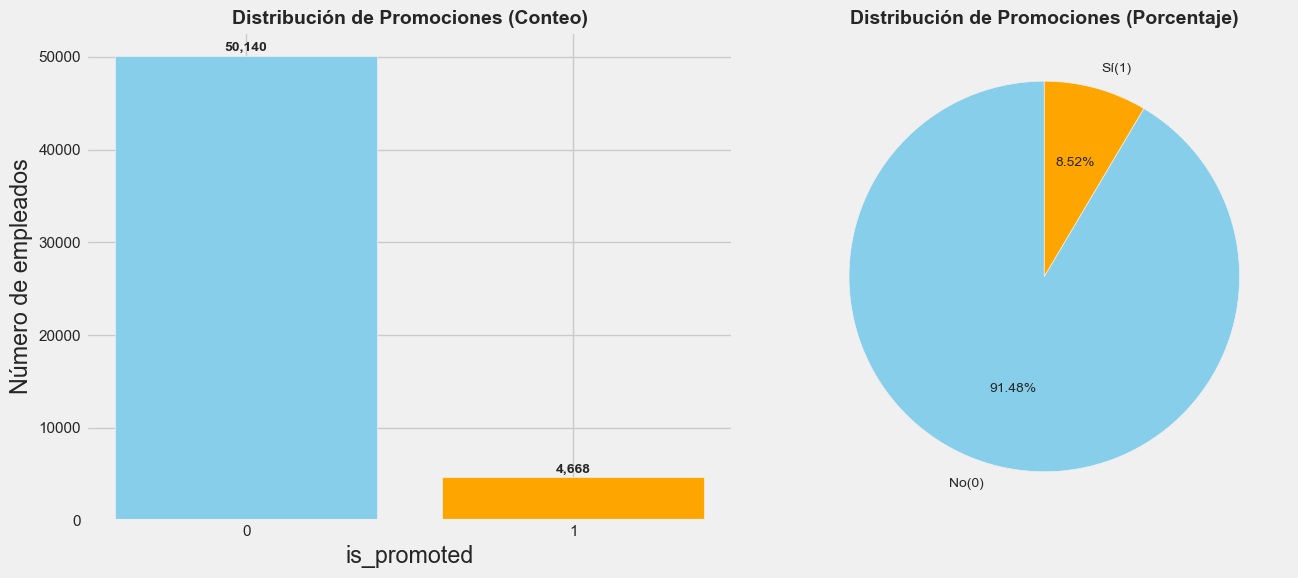

In [4]:
# ================================================
#  Distribución de la variable objetivo "is_promoted"
# ================================================
target_counts = data_train['is_promoted'].value_counts()

# Calcular porcentajes
percentages = (target_counts / target_counts.sum()) * 100

# Crear figura con dos gráficos (barras y pastel)
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# --------------------------------
# 1) Gráfico de barras
# --------------------------------
bars = axes[0].bar(target_counts.index.astype(str), target_counts.values, color=['skyblue', 'orange'])

# Etiquetas encima de cada barra
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, height + 200,   # posición del texto
                 f'{height:,}', ha='center', va='bottom', fontsize=10, fontweight='bold')

axes[0].set_title("Distribución de Promociones (Conteo)", fontsize=14, fontweight='bold')
axes[0].set_xlabel("is_promoted")
axes[0].set_ylabel("Número de empleados")

# --------------------------------
# 2) Gráfico circular
# --------------------------------
axes[1].pie(target_counts, labels=["No(0) ", "Sí(1)"],
            autopct='%1.2f%%', colors=['skyblue', 'orange'], startangle=90, textprops={'fontsize': 10})

axes[1].set_title("Distribución de Promociones (Porcentaje)", fontsize=14, fontweight='bold')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


# 2- Análisis exploratorio de datos

In [5]:
# ================================================
#  Separar variables numéricas y categóricas
# ================================================

# Listas con los nombres de las columnas
numeric_cols = data_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data_train.select_dtypes(include=['object']).columns.tolist()

# Crear datasets separados
data_num = data_train[numeric_cols]    # Solo variables numéricas
data_cat = data_train[categorical_cols] # Solo variables categóricas

# Mostrar resultados
print(" Variables numéricas:", numeric_cols)
print(" Total:", len(numeric_cols))
print("\n Variables categóricas:", categorical_cols)
print(" Total:", len(categorical_cols))


 Variables numéricas: ['employee_id', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']
 Total: 9

 Variables categóricas: ['department', 'region', 'education', 'gender', 'recruitment_channel']
 Total: 5


In [6]:
data_num.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0


In [7]:
data_num = data_num.drop(columns=['employee_id'])  # Eliminar columnas irrelevantes
numeric_cols = data_num.columns.tolist()  # Actualizar lista de columnas numéricas
data_num.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.0,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.0,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.0,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.0,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.0,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.0,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.0,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.0,0.0,0.0,1.0


### Resumen de Resultados Estadísticos

Los resultados muestran un **resumen estadístico de las variables numéricas** del dataset:  

- La mayoría de empleados han realizado **pocas capacitaciones** (`no_of_trainings` tiene una media cercana a 1 y un máximo de 10).  
- La edad promedio es de **35 años**, con un rango entre 20 y 60 años.  
- La variable **previous_year_rating** presenta valores faltantes (solo 50,684 registros) y una media de 3.3 sobre 5, lo que indica un desempeño intermedio en general.  
- El **tiempo de servicio** promedio es de casi 6 años, aunque hay empleados con hasta 37 años en la organización.  
- Solo el **35% de los empleados cumplen más del 80% de los KPIs**, y apenas un **2% ha recibido premios**.  
- El **puntaje promedio de entrenamiento** es de 63 sobre 100, con variabilidad considerable (mínimo de 39 y máximo de 99).  


In [8]:
data_cat.head()

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other


In [10]:
data_cat.describe().T

,count,unique,top,freq
department,54808,9,Sales & Marketing,16840
region,54808,34,region_2,12343
education,52399,3,Bachelor's,36669
gender,54808,2,m,38496
recruitment_channel,54808,3,other,30446


### Resumen de Variables Categóricas

- **department**: Hay **9 departamentos distintos**, siendo **Sales & Marketing** el más frecuente con **16,840 empleados**.  
- **region**: Existen **34 regiones** en total, donde **region_2** concentra la mayor cantidad de empleados (**12,343**).  
- **education**: Presenta **valores faltantes** (52,399 registros frente a 54,808 empleados). La categoría más común es **Bachelor's**, con **36,669 empleados**.  
- **gender**: La distribución está desbalanceada: predominan los hombres (**38,496**) frente a las mujeres. Solo hay **2 categorías**.  
- **recruitment_channel**: Se observan **3 canales de reclutamiento**, donde el canal **other** es el más usado (**30,446 empleados**).  

###  Identificación de Valores Faltantes

En los análisis previos observamos que existen tanto **variables categóricas** como **variables numéricas** que presentan datos faltantes.  
Para cuantificar este problema, construimos un resumen que muestra:  

- El **nombre de la variable** con valores nulos.  
- La **cantidad de valores faltantes** en cada columna.  
- El **porcentaje de datos faltantes** respecto al total de registros del dataset.  

Este análisis es clave para decidir las estrategias de **limpieza y tratamiento de datos** que aplicaremos antes del modelado.


In [11]:
# ================================================
#  Identificación de variables con valores faltantes
# ================================================

# Calcular el número de valores nulos en cada columna del dataset de entrenamiento
data_missing = data_train.isnull().sum().reset_index()

# Renombrar las columnas del DataFrame resultante:
# - 'feature' → nombre de la variable
# - 'missing_value' → cantidad de valores nulos
data_missing.columns = ['feature', 'missing_value']

# Filtrar solo aquellas variables que tienen al menos un valor faltante
# y reiniciar el índice para mantenerlo consecutivo
data_missing = data_missing[data_missing['missing_value'] > 0].reset_index(drop=True)

# Calcular el porcentaje de valores faltantes respecto al total de registros
data_missing['percentage'] = (data_missing['missing_value'] / len(data_train)) * 100

# Mostrar el resumen final de las variables con valores faltantes
data_missing


,feature,missing_value,percentage
0,education,2409,4.395344
1,previous_year_rating,4124,7.524449


###  Estrategia para el Tratamiento de Valores Faltantes

Antes de decidir cómo proceder, es importante notar que el conjunto de datos de prueba (**data_test**) también contiene valores faltantes en las columnas **education** y **previous_year_rating**.  Por lo tanto, debemos asegurarnos de que el modelo sepa cómo manejar estos casos durante el entrenamiento y pueda generalizar correctamente en la predicción.  

Con base en esto, aplicaremos dos modificaciones clave:

1. **education** → Los valores faltantes serán reemplazados por una nueva categoría `"Unknown"`.  
   - Esto permitirá que el modelo considere la ausencia de información como un valor válido y potencialmente informativo.  

2. **previous_year_rating** → Los valores faltantes serán imputados utilizando un modelo de machine learning que prediga la calificación a partir de otras variables.  
   - De esta forma, se conserva la naturaleza ordinal de la variable y se evita perder información relevante.  

In [13]:
print("Categorías únicas:", data_cat['education'].unique())

Categorías únicas: ["Master's & above" "Bachelor's" nan 'Below Secondary']


In [14]:
# ================================================
# Reemplazo de valores faltantes en 'education'
# ================================================

# Reemplazar valores faltantes por "Unknown" en training
data_cat['education'] = data_cat['education'].fillna("Unknown")
data_train['education'] = data_train['education'].fillna("Unknown")
# Verificar resultado
print("Valores faltantes en training:", data_cat['education'].isnull().sum())
print("Categorías únicas:", data_cat['education'].unique())

# Luego tambien debemos reemplazar en data Test

Valores faltantes en training: 0
Categorías únicas: ["Master's & above" "Bachelor's" 'Unknown' 'Below Secondary']


### ¿Vale la pena usar un modelo para imputar?

Antes de decidir cómo proceder con los valores faltantes, debemos preguntarnos si realmente es necesario aplicar una imputación compleja mediante un modelo de regresión. En algunos casos, técnicas más simples (como reemplazar por la mediana o la moda) pueden ser suficientes, mientras que en otros un modelo puede capturar mejor la relación entre variables.

Debemos revisar primero la correlación versus otras variables para tomar la decisión


🔎 Correlación con previous_year_rating:

previous_year_rating    1.000000
KPIs_met >80%           0.351578
is_promoted             0.159320
avg_training_score      0.075139
awards_won?             0.027738
age                     0.006008
length_of_service       0.000253
no_of_trainings        -0.063126
Name: previous_year_rating, dtype: float64


C:\Users\jlvar\AppData\Local\Temp\ipykernel_16252\2353857951.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target.values, y=corr_target.index, palette="viridis")


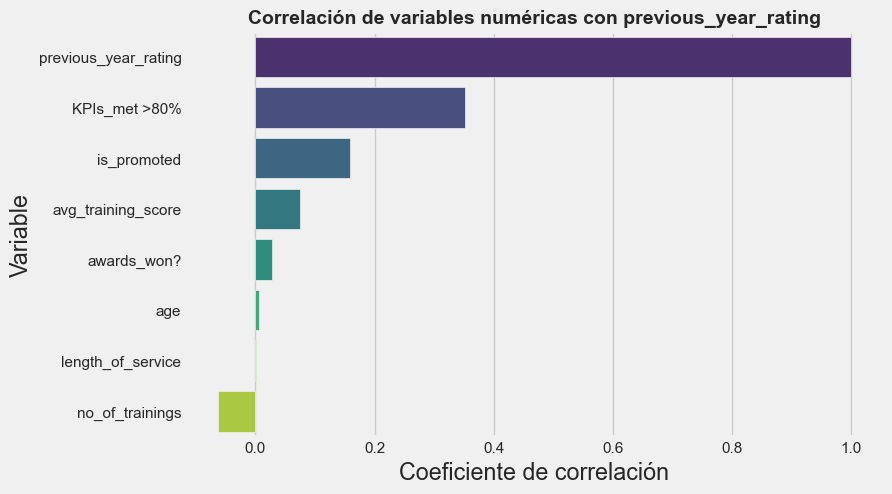

In [15]:
# ================================================
# Correlación entre variables numéricas y previous_year_rating
# ================================================

# Calculamos la matriz de correlación
corr_matrix = data_num.corr()

# Extraemos solo la correlación con 'previous_year_rating'
corr_target = corr_matrix['previous_year_rating'].sort_values(ascending=False)

# Mostrar resultados
print("🔎 Correlación con previous_year_rating:\n")
print(corr_target)

# ================================================
# 🎨 Visualización de la correlación con un gráfico de barras
# ================================================
plt.figure(figsize=(8,5))
sns.barplot(x=corr_target.values, y=corr_target.index, palette="viridis")

plt.title("Correlación de variables numéricas con previous_year_rating", fontsize=14, fontweight='bold')
plt.xlabel("Coeficiente de correlación")
plt.ylabel("Variable")
plt.show()


### Reflexión sobre la imputación de `previous_year_rating`

A la luz de los resultados de correlación observados, vemos complicado que un modelo de regresión pueda ofrecer buenos resultados para imputar los valores faltantes de la variable `previous_year_rating`. Por lo tanto, optaremos por utilizar otra técnica más adecuada para este escenario.

En principio, podríamos simplemente imputar los valores faltantes con la mediana o la media (dado que la distribución de esta columna parece aproximarse a una normal). Sin embargo, con fines educativos aplicaremos un método más avanzado: KNN Imputer.

###  ¿Cómo funciona KNN Imputer?

El KNN Imputer se basa en el algoritmo de los *k vecinos más cercanos*:  

1. **Identificación del dato faltante** → localiza las observaciones con valores nulos en una columna.  
2. **Búsqueda de vecinos** → utiliza otras variables numéricas para calcular la similitud entre registros (mediante distancias, normalmente euclidianas).  
3. **Imputación** → reemplaza el valor faltante por el promedio de los valores de esa misma variable en los **k vecinos más cercanos** (ejemplo: con `k=5` se toma el promedio de los 5 vecinos más parecidos).  

De esta forma, no se pierde información y la imputación está contextualizada en función de empleados con características similares.


In [16]:
# ================================================
#  KNN Imputer para imputar valores faltantes
# ================================================

# Inicializar el imputador KNN
# n_neighbors = 5 busca los 5 vecinos más cercanos
imputer = KNNImputer(n_neighbors=5)

# Ajustar y transformar los datos
data_num_imputed = imputer.fit_transform(data_num)

# Volvemos a convertirlo en DataFrame
data_num_imputed = pd.DataFrame(data_num_imputed, columns=data_num.columns)

# Reemplazamos las columnas imputadas en el dataset original
data_num = data_num_imputed

# Verificación
print("Valores faltantes después de imputar:")
print(data_num.isnull().sum())


Valores faltantes después de imputar:
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64


### Data Visualizations

C:\Users\jlvar\AppData\Local\Temp\ipykernel_16252\3872163535.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_num[col], palette="turbo")
C:\Users\jlvar\AppData\Local\Temp\ipykernel_16252\3872163535.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_num[col], palette="turbo")
C:\Users\jlvar\AppData\Local\Temp\ipykernel_16252\3872163535.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_num[col], palette="turbo")
C:\Users\jlvar\AppData\Local\Temp\ipykernel_16252\3872163535.py:14: FutureWarning: 

Passing `pal

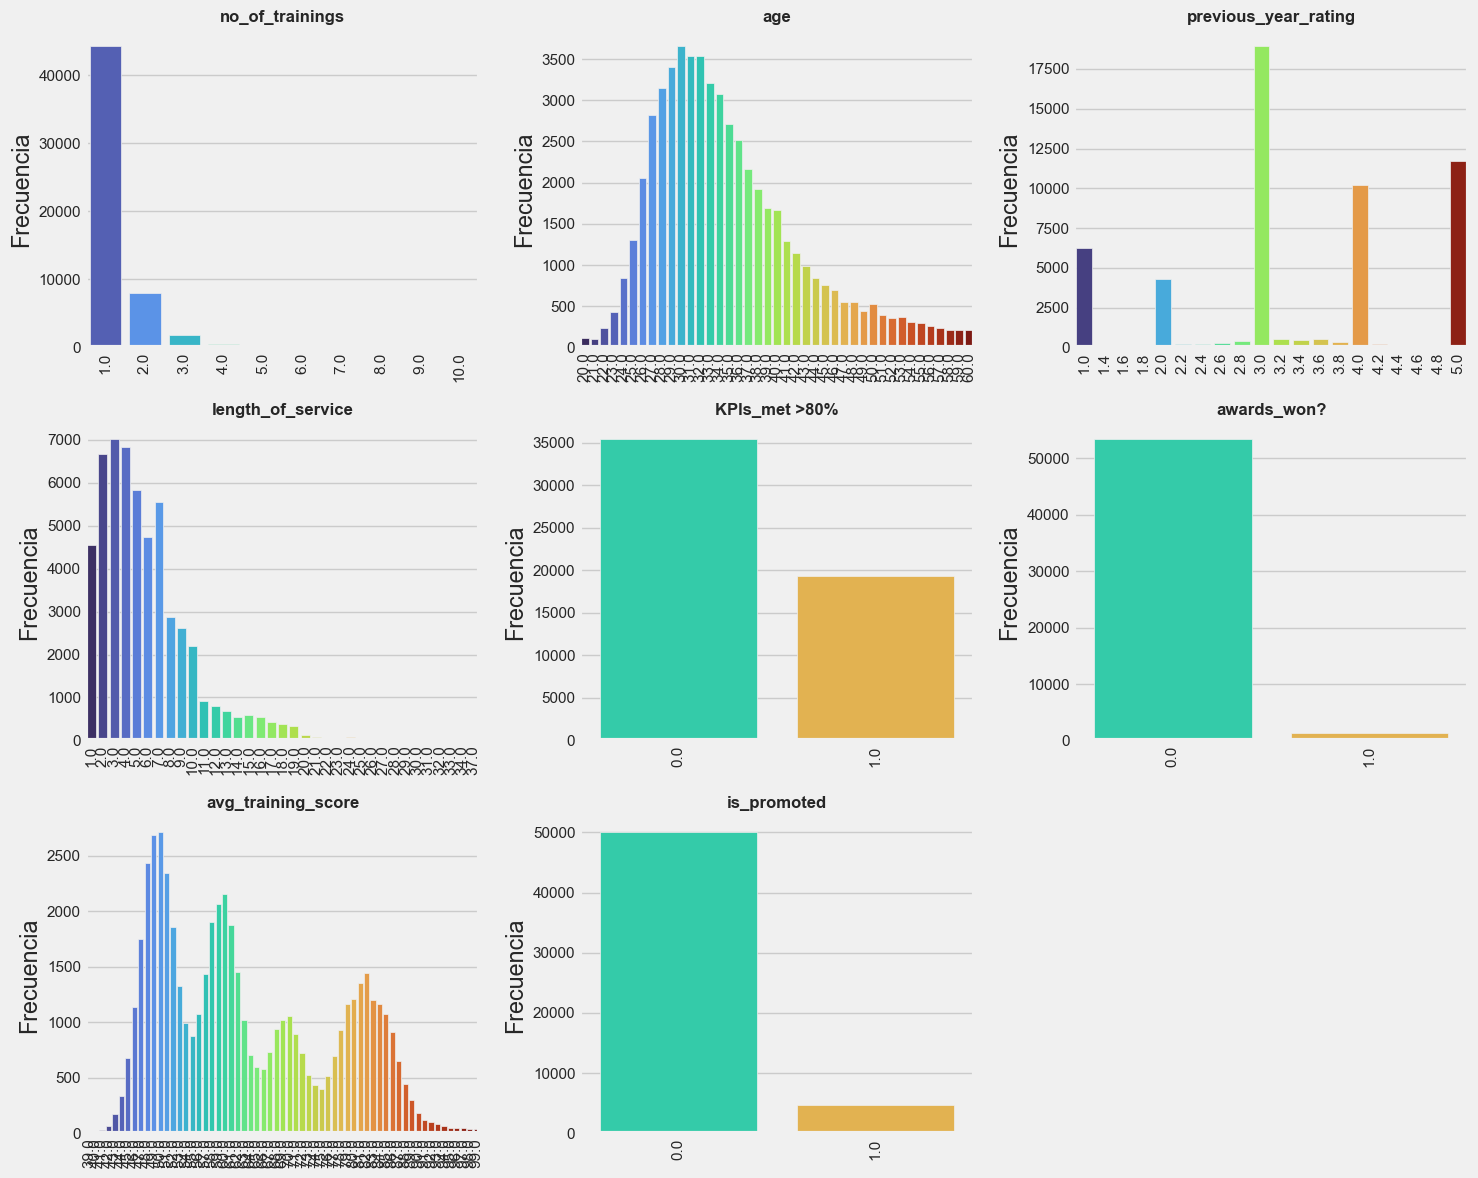

In [17]:
# ================================================
# Gráficos de barras en grid para variables numéricas discretas
# ================================================

# Variables numéricas (puedes filtrar discreta vs continua si quieres)
num_vars = data_num.columns
cols = 3   # número de gráficos por fila
rows = (len(num_vars) // cols) + int(len(num_vars) % cols > 0)

plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(num_vars, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(x=data_num[col], palette="turbo")
    plt.title(col, fontsize=12, fontweight='bold')
    plt.xlabel("")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=90)
    
plt.tight_layout()
plt.show()
# ================================================

### Distribución de Variables Numéricas

En la figura se presentan gráficos de barras para todas las variables numéricas del dataset.  
Esta visualización nos permite identificar la frecuencia de valores en cada variable y diferenciar aquellas que son esencialmente categóricas discretas de las que muestran un comportamiento más continuo.

- **Variables discretas/categóricas** como `no_of_trainings`, `previous_year_rating`, `KPIs_met > 80%`, `awards_won?` e `is_promoted` muestran pocos valores únicos y distribuciones muy concentradas en una o dos categorías.  
- **Variables numéricas continuas** como `age`, `length_of_service` y `avg_training_score` exhiben distribuciones más amplias y con mayor variabilidad entre los individuos.

Para las variables discretas es apropiado usar gráficos de barras, ya que reflejan claramente la concentración en determinadas categorías.  
En cambio, para las variables numéricas continuas realizaremos boxplots, lo que nos permitirá analizar su dispersión, rango intercuartílico y posibles valores atípicos.


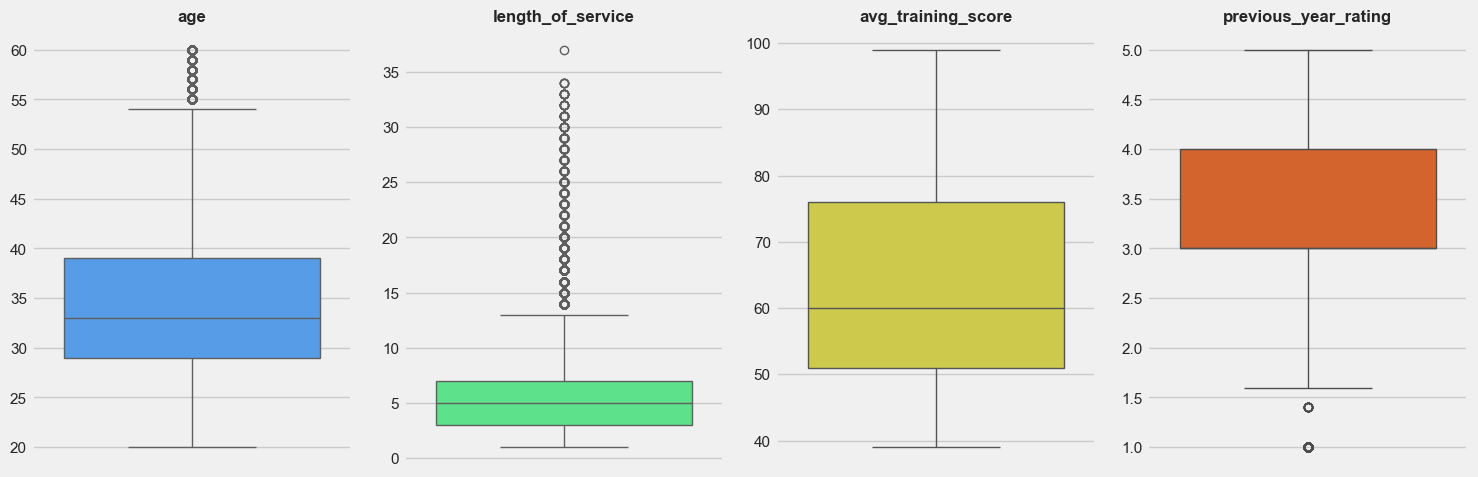

In [18]:
# ================================================
# Boxplots de variables numéricas continuas con colores
# ================================================

# Variables continuas
continuous_vars = ['age', 'length_of_service', 'avg_training_score', 'previous_year_rating']

# Definir paleta de colores "turbo"
colors = sns.color_palette("turbo", len(continuous_vars))

# Grid
cols = 4
rows = 1
plt.figure(figsize=(15, 5))

for i, col in enumerate(continuous_vars, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=data_num[col], color=colors[i-1])
    plt.title(col, fontsize=12, fontweight='bold')
    plt.ylabel("")

plt.tight_layout()
plt.show()

- **Age** → La mayoría de empleados se concentra entre 30 y 40 años, con algunos outliers por encima de los 55.  
- **Length of service** → Predomina entre 3 y 7 años, aunque hay empleados con trayectorias muy largas (outliers hasta 37 años).  
- **Avg training score** → Distribución más amplia, con mediana cercana a 60 y valores que van de 40 a 100, reflejando gran variabilidad en el desempeño en entrenamientos.

A pesar de que se presentan valores fuera del rango tipico , si analizamos los números a la luz del contexto del problema no son datos atípicos, por tanto los mantendremos


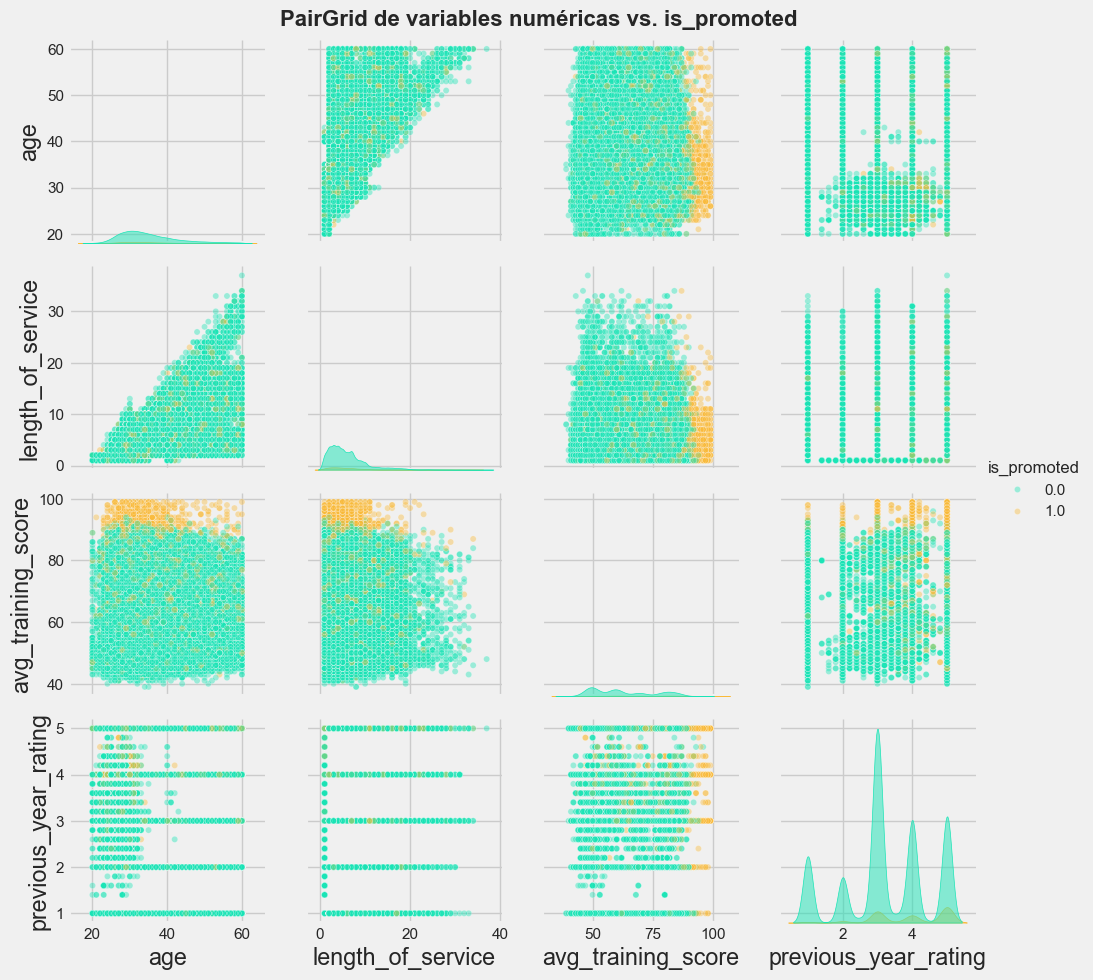

In [19]:

# ================================================
# PairGrid de variables numéricas con KDE en la diagonal
# ================================================

# Crear PairGrid con la paleta "turbo"
g = sns.PairGrid(
    data_num[continuous_vars + ['is_promoted']],
    hue="is_promoted", 
    palette="turbo"
    #corner=True  # Solo la mitad inferior del grid
)

# Gráficos en la diagonal → KDE (densidad)
g.map_diag(sns.kdeplot, fill=True, alpha=0.5)

# Gráficos fuera de la diagonal → dispersión con transparencia
g.map_offdiag(sns.scatterplot, alpha=0.4, s=20)

# Añadir leyenda con mejor ubicación
g.add_legend(title="is_promoted")

# Ajustar títulos y diseño
plt.subplots_adjust(top=0.95)
g.fig.suptitle("PairGrid de variables numéricas vs. is_promoted", fontsize=16, fontweight="bold")

plt.show()




- **Age** → La distribución de edades es muy similar entre promovidos y no promovidos, con mayor concentración en los 30-40 años. No se observan diferencias notables entre ambos grupos.  

- **Length of service** → La mayoría de empleados tiene entre 3 y 7 años de servicio, pero los promovidos y no promovidos se solapan casi por completo. Solo algunos casos con más de 15 años de servicio aparecen como outliers.  

- **Avg training score** → Aquí se aprecia una ligera diferencia: los empleados promovidos (`is_promoted=1`) tienden a concentrarse en puntajes de entrenamiento más altos (por encima de 70), en contraste con los no promovidos, cuya distribución es más dispersa.  


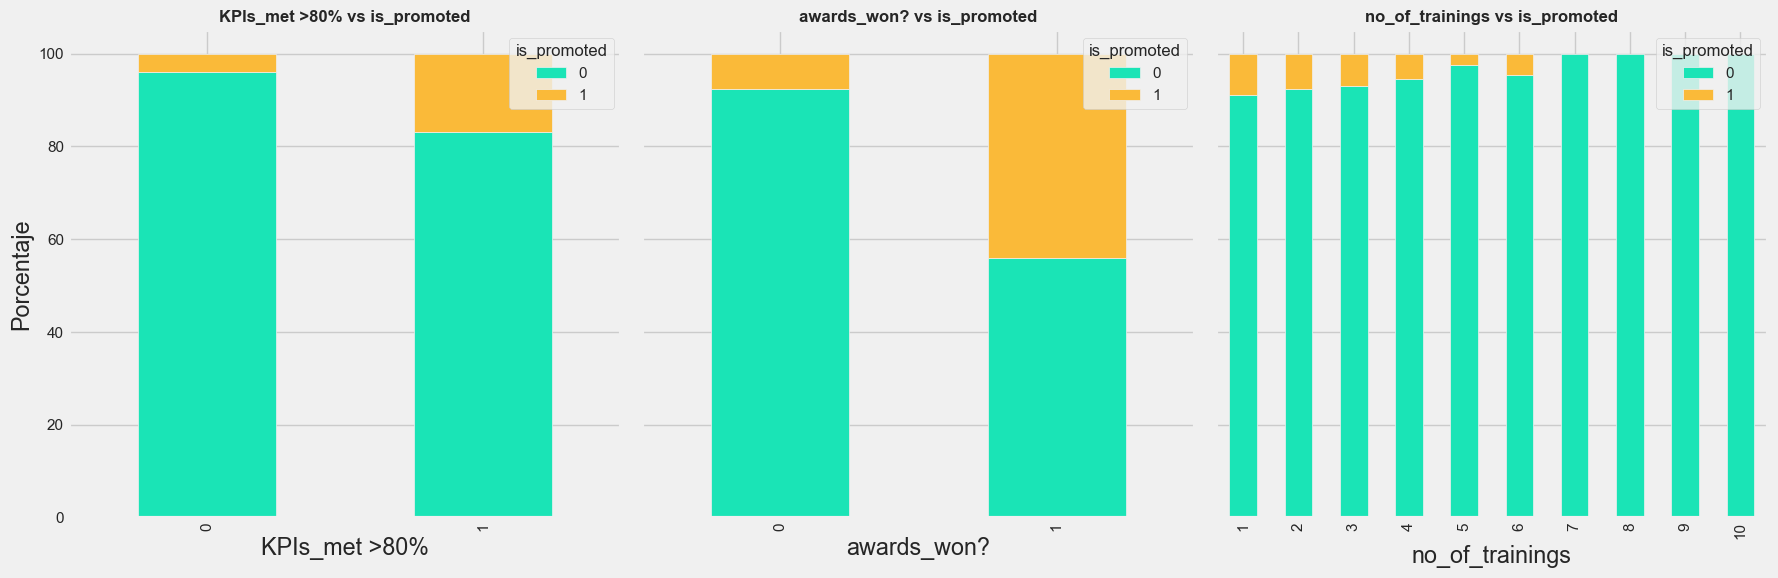

In [20]:

# ================================================
# Barras apiladas en porcentaje vs is_promoted
# ================================================

# Variables categóricas numéricas que queremos analizar
cat_vars = ['KPIs_met >80%', 'awards_won?', 'no_of_trainings'] 
colors = sns.color_palette("turbo", 2)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, col in enumerate(cat_vars):
    # Crear tabla cruzada con proporciones
    prop = (pd.crosstab(data_train[col], data_train['is_promoted'], normalize='index') * 100)
    
    # Graficar barras apiladas
    prop.plot(kind='bar', stacked=True, ax=axes[i], color=colors)
    
    # Estética
    axes[i].set_title(f"{col} vs is_promoted", fontsize=12, fontweight="bold")
    axes[i].set_ylabel("Porcentaje")
    axes[i].set_xlabel(col)
    axes[i].legend(title="is_promoted", loc="upper right")

plt.tight_layout()
plt.show()


- **KPIs_met > 80%** → Los empleados que cumplen más del 80% de sus KPIs tienen una **mayor proporción de promociones** que aquellos que no lo hacen, lo que confirma que este indicador es un factor clave en las decisiones de ascenso.  

- **Awards_won?** → Aunque pocos empleados reciben premios, la proporción de promovidos dentro de este grupo es **considerablemente más alta** que en quienes no han recibido reconocimientos. Esto sugiere que los premios funcionan como un fuerte diferenciador en la promoción.  

- **No_of_trainings** → La distribución muestra que la proporción de promovidos se mantiene bastante constante independientemente del número de entrenamientos recibidos. Esto indica que la cantidad de capacitaciones no es un factor determinante directo en la promoción.  


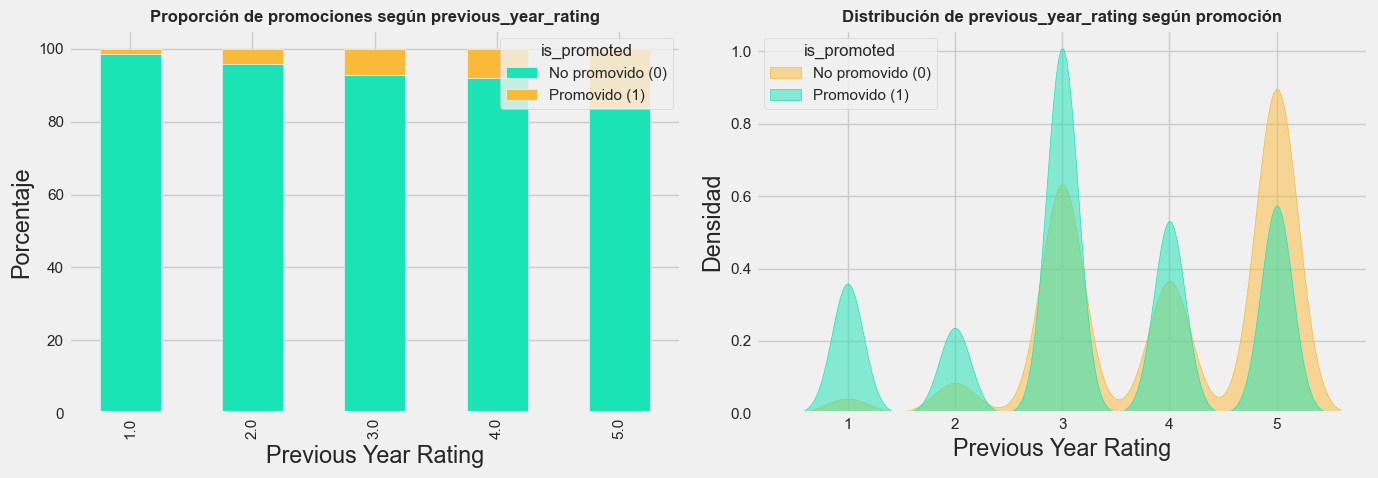

In [22]:

# Crear tabla cruzada con proporciones (%)
prop = (pd.crosstab(data_train['previous_year_rating'], data_train['is_promoted'], normalize='index') * 100)

# Definir colores consistentes con la paleta "turbo"
colors = sns.color_palette("turbo", 2)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --------------------------------
# 1) Gráfico de barras apiladas
# --------------------------------
prop.plot(kind='bar', stacked=True, ax=axes[0], color=colors)

axes[0].set_title("Proporción de promociones según previous_year_rating", fontsize=12, fontweight='bold')
axes[0].set_ylabel("Porcentaje")
axes[0].set_xlabel("Previous Year Rating")
axes[0].legend(title="is_promoted", labels=["No promovido (0)", "Promovido (1)"], loc="upper right")

# --------------------------------
# 2) Gráfico KDE
# --------------------------------
sns.kdeplot(data=data_train, x="previous_year_rating", hue="is_promoted",
            fill=True, common_norm=False, alpha=0.5, palette=colors, ax=axes[1])

axes[1].set_title("Distribución de previous_year_rating según promoción", fontsize=12, fontweight='bold')
axes[1].set_xlabel("Previous Year Rating")
axes[1].set_ylabel("Densidad")
axes[1].legend(title="is_promoted", labels=["No promovido (0)", "Promovido (1)"])

plt.tight_layout()
plt.show()




- **Gráfico de barras (izquierda):**  
  Se observa una clara tendencia: a medida que aumenta la calificación del año anterior, también crece la proporción de empleados promovidos.  
  - En los niveles más bajos (1 y 2), la probabilidad de promoción es mínima.  
  - A partir de valores altos (4 y 5), la proporción de promociones se incrementa notablemente.  

- **Distribución KDE (derecha):**  
  Las curvas de densidad refuerzan este patrón.  
  - Los empleados*no promovidos (0) se concentran principalmente en calificaciones medias y altas, pero con menor peso en el extremo superior.  
  - Los empleados promovidos (1) muestran mayor densidad en calificaciones 4 y 5, lo que indica que los buenos resultados en el año previo son un factor clave en la decisión de ascenso.  

`previous_year_rating` es una de las variables con mayor capacidad de discriminación entre empleados promovidos y no promovidos. Su efecto es casi lineal: **a mejor rating, mayor probabilidad de promoción**.


###  Multivariate Analysis (Análisis Multivariado)  

El análisis multivariado busca comprender las relaciones simultáneas entre varias variables dentro del dataset.  
Mientras que en los análisis univariados o bivariados observamos una sola variable o la relación entre dos, el enfoque multivariado nos permite:  

- Detectar patrones complejos que solo aparecen al considerar múltiples variables al mismo tiempo.  
- Identificar factores combinados que influyen en la variable objetivo (`is_promoted`).  
- Visualizar cómo diferentes características (numéricas y categóricas) interactúan entre sí y con el resultado final.  

En esta sección utilizaremos técnicas de visualización como  **heatmaps de correlación**  para explorar cómo las variables se relacionan entre sí y con la probabilidad de promoción.  

El objetivo es descubrir interacciones clave entre los factores del desempeño, experiencia, formación y resultados previos que podrían mejorar la capacidad predictiva de nuestros modelos de *machine learning*.  


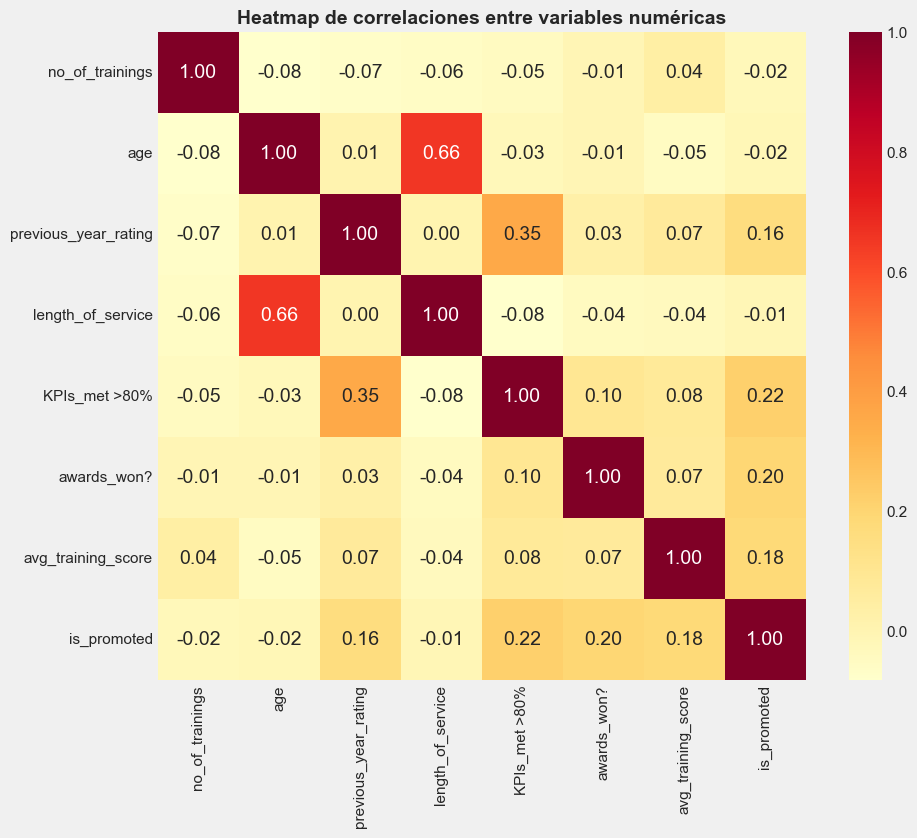

In [23]:
# ================================================
# Heatmap de correlaciones 
# ================================================

# Calcular matriz de correlación
corr = data_num.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="YlOrRd", cbar=True, square=True)

plt.title("Heatmap de correlaciones entre variables numéricas", fontsize=14, fontweight="bold")
plt.show()


En este heatmap observamos la relación entre las variables numéricas del dataset. Algunos hallazgos clave:

1. **age y length_of_service** → presentan una correlación fuerte y positiva (**0.66**), lo cual es lógico: a mayor edad, suele acumularse más tiempo de servicio en la organización.  

2. **previous_year_rating y KPIs_met > 80%** → muestran una correlación moderada (**0.35**). Esto sugiere que un buen desempeño en KPIs tiende a reflejarse en una mejor calificación en la evaluación anual.  

3. Respecto a la variable objetivo **is_promoted**:  
   - Se correlaciona más con **KPIs_met > 80% (0.22)**, **awards_won? (0.20)** y **avg_training_score (0.18)**.  
   - Esto indica que el rendimiento medido por KPIs, los premios obtenidos y el puntaje de capacitación son los factores que más inciden en las promociones.  

4. El resto de las correlaciones son bajas, lo que sugiere que muchas variables aportan información de manera independiente, sin redundancia excesiva.  



## Análisis Exploratorio de Datos (AED) – Variables Categóricas  

En esta sección se analizan las variables categóricas del dataset:  
- **department**  
- **region**  
- **education**  
- **gender**  
- **recruitment_channel**  

El objetivo es entender cómo se distribuyen estas categorías dentro de la población y cuál es su relación con la variable objetivo **`is_promoted`**.  


C:\Users\jlvar\AppData\Local\Temp\ipykernel_16252\2943788475.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data_cat, x=col, order=data_cat[col].value_counts().index, palette="turbo")
C:\Users\jlvar\AppData\Local\Temp\ipykernel_16252\2943788475.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data_cat, x=col, order=data_cat[col].value_counts().index, palette="turbo")
C:\Users\jlvar\AppData\Local\Temp\ipykernel_16252\2943788475.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data_cat, x=col, 

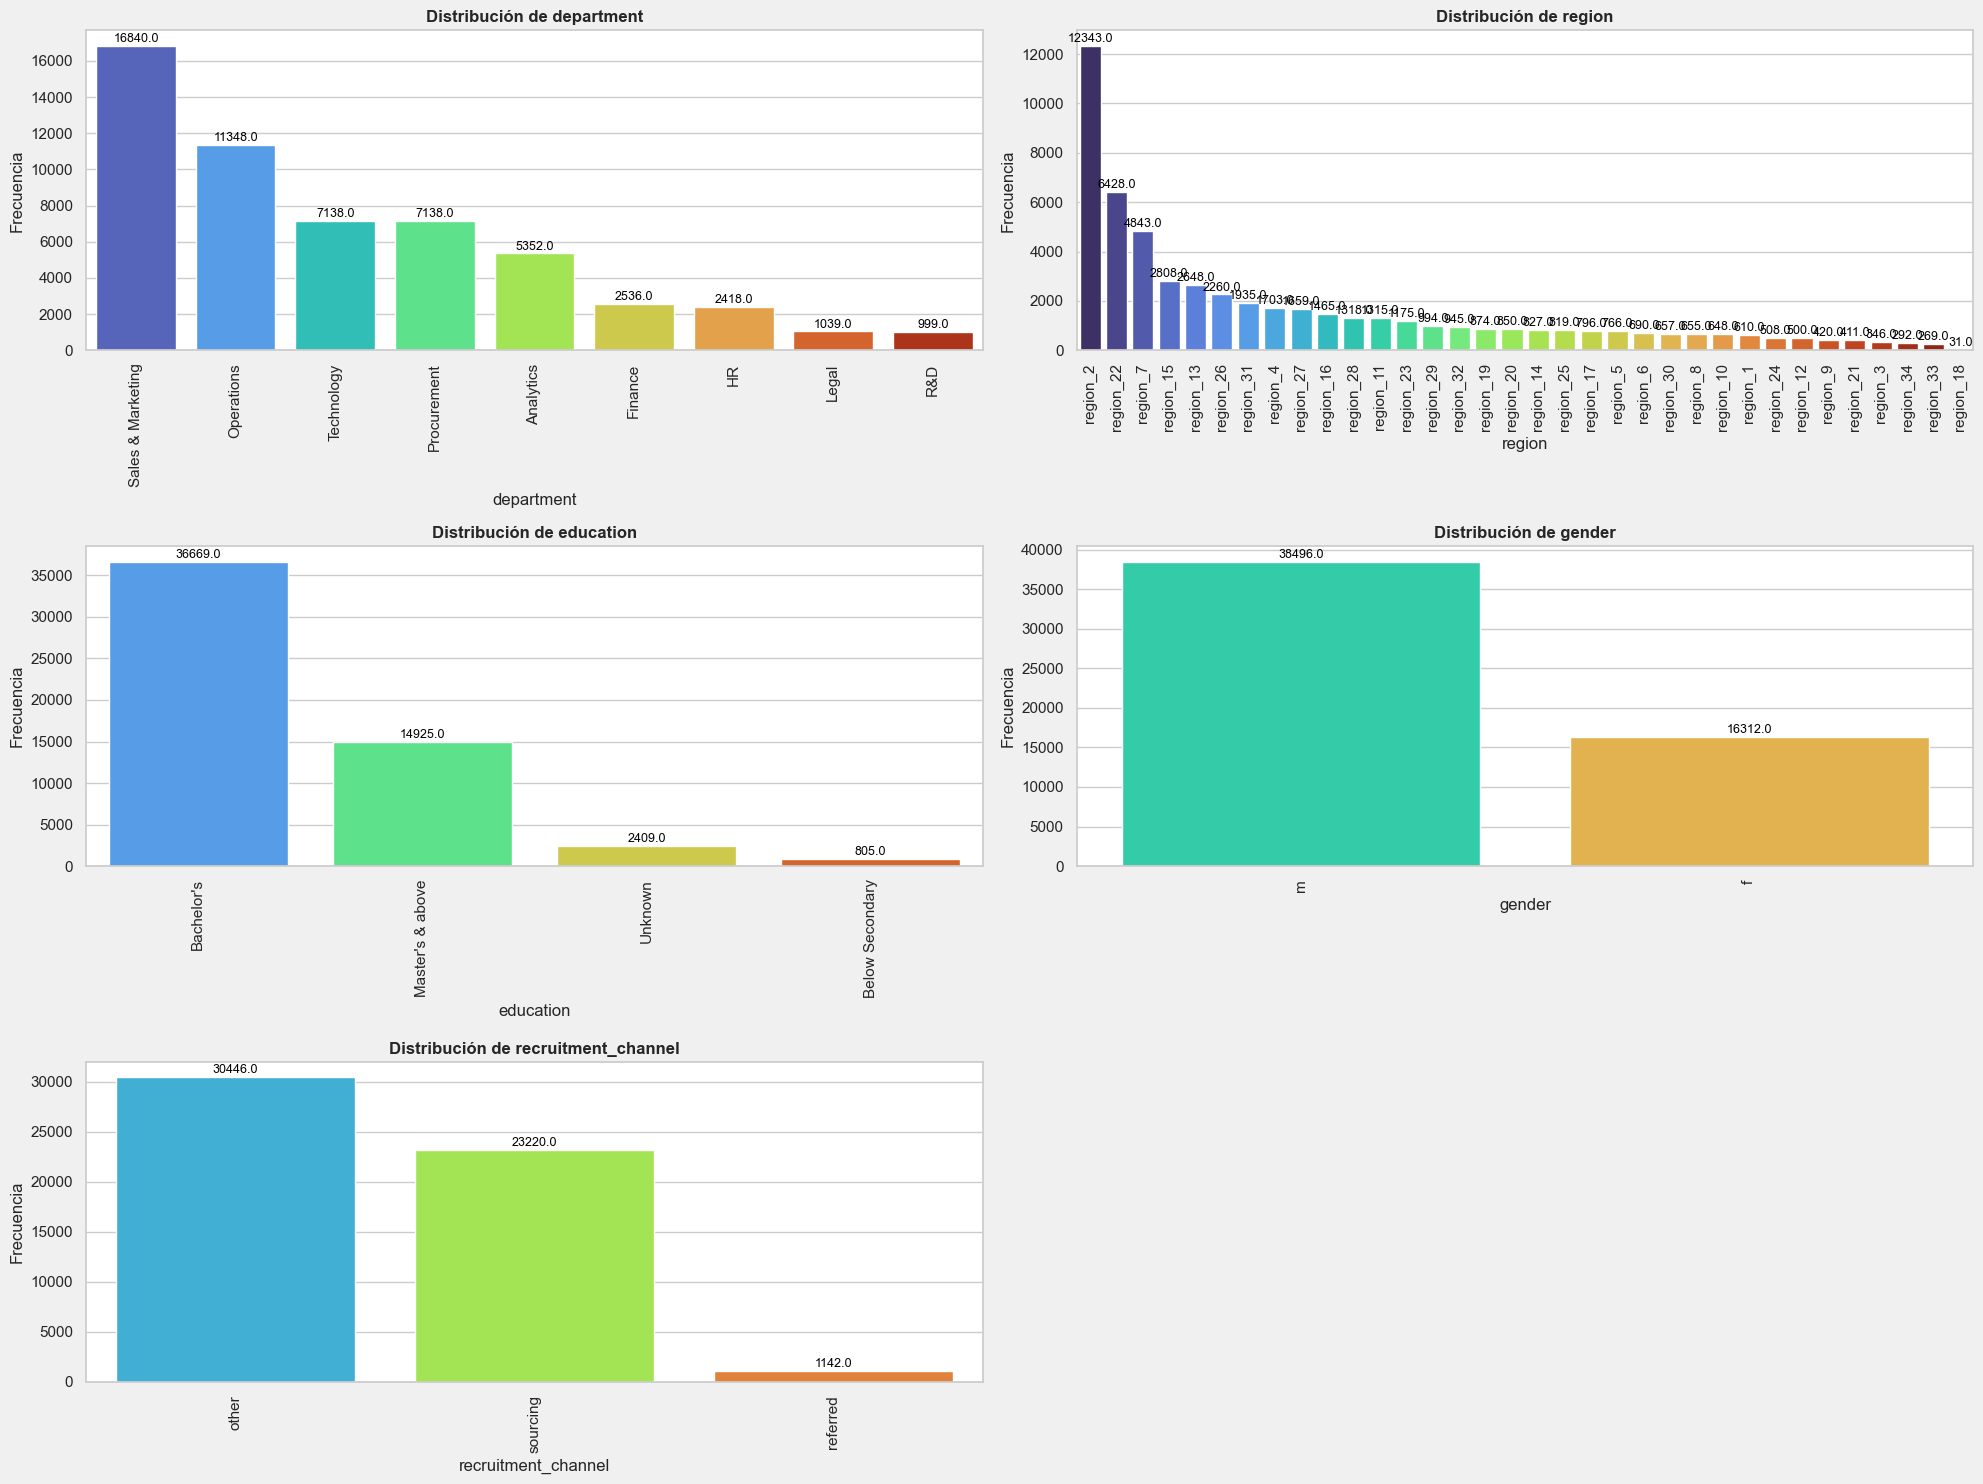

In [24]:
# ====================================================
# AED de variables categóricas
# ====================================================

# Tamaño de figura y estilo
plt.figure(figsize=(20, 15))
sns.set(style="whitegrid")

# Grid para gráficos
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    
    # Conteo de categorías
    ax = sns.countplot(data=data_cat, x=col, order=data_cat[col].value_counts().index, palette="turbo")
    
    # Rotar etiquetas si son muchas categorías
    plt.xticks(rotation=90)
    
    # Agregar etiquetas de conteo
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')
    
    plt.title(f"Distribución de {col}", fontsize=12, fontweight="bold")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


- **Department**: la mayor concentración de empleados está en *Sales & Marketing* y *Operations*, mientras que áreas como *HR* o *R&D* son mucho más pequeñas.  
- **Region**: existe una fuerte disparidad; algunas regiones como *region_2* concentran gran parte de la plantilla, mientras que muchas otras tienen baja representación.  
- **Education**: la mayoría de empleados tiene nivel *Bachelor’s*, seguido por *Master’s & above*. Los valores faltantes fueron tratados como categoría *Unknown*.  
- **Gender**: se observa un claro predominio masculino en la muestra.  
- **Recruitment_channel**: el canal *other* es el más utilizado, seguido de *sourcing*. El canal *referred* es minoritario.  

En general, las variables categóricas muestran*desbalances en las distribuciones, lo que puede influir en los modelos predictivos y debe considerarse en el preprocesamiento.

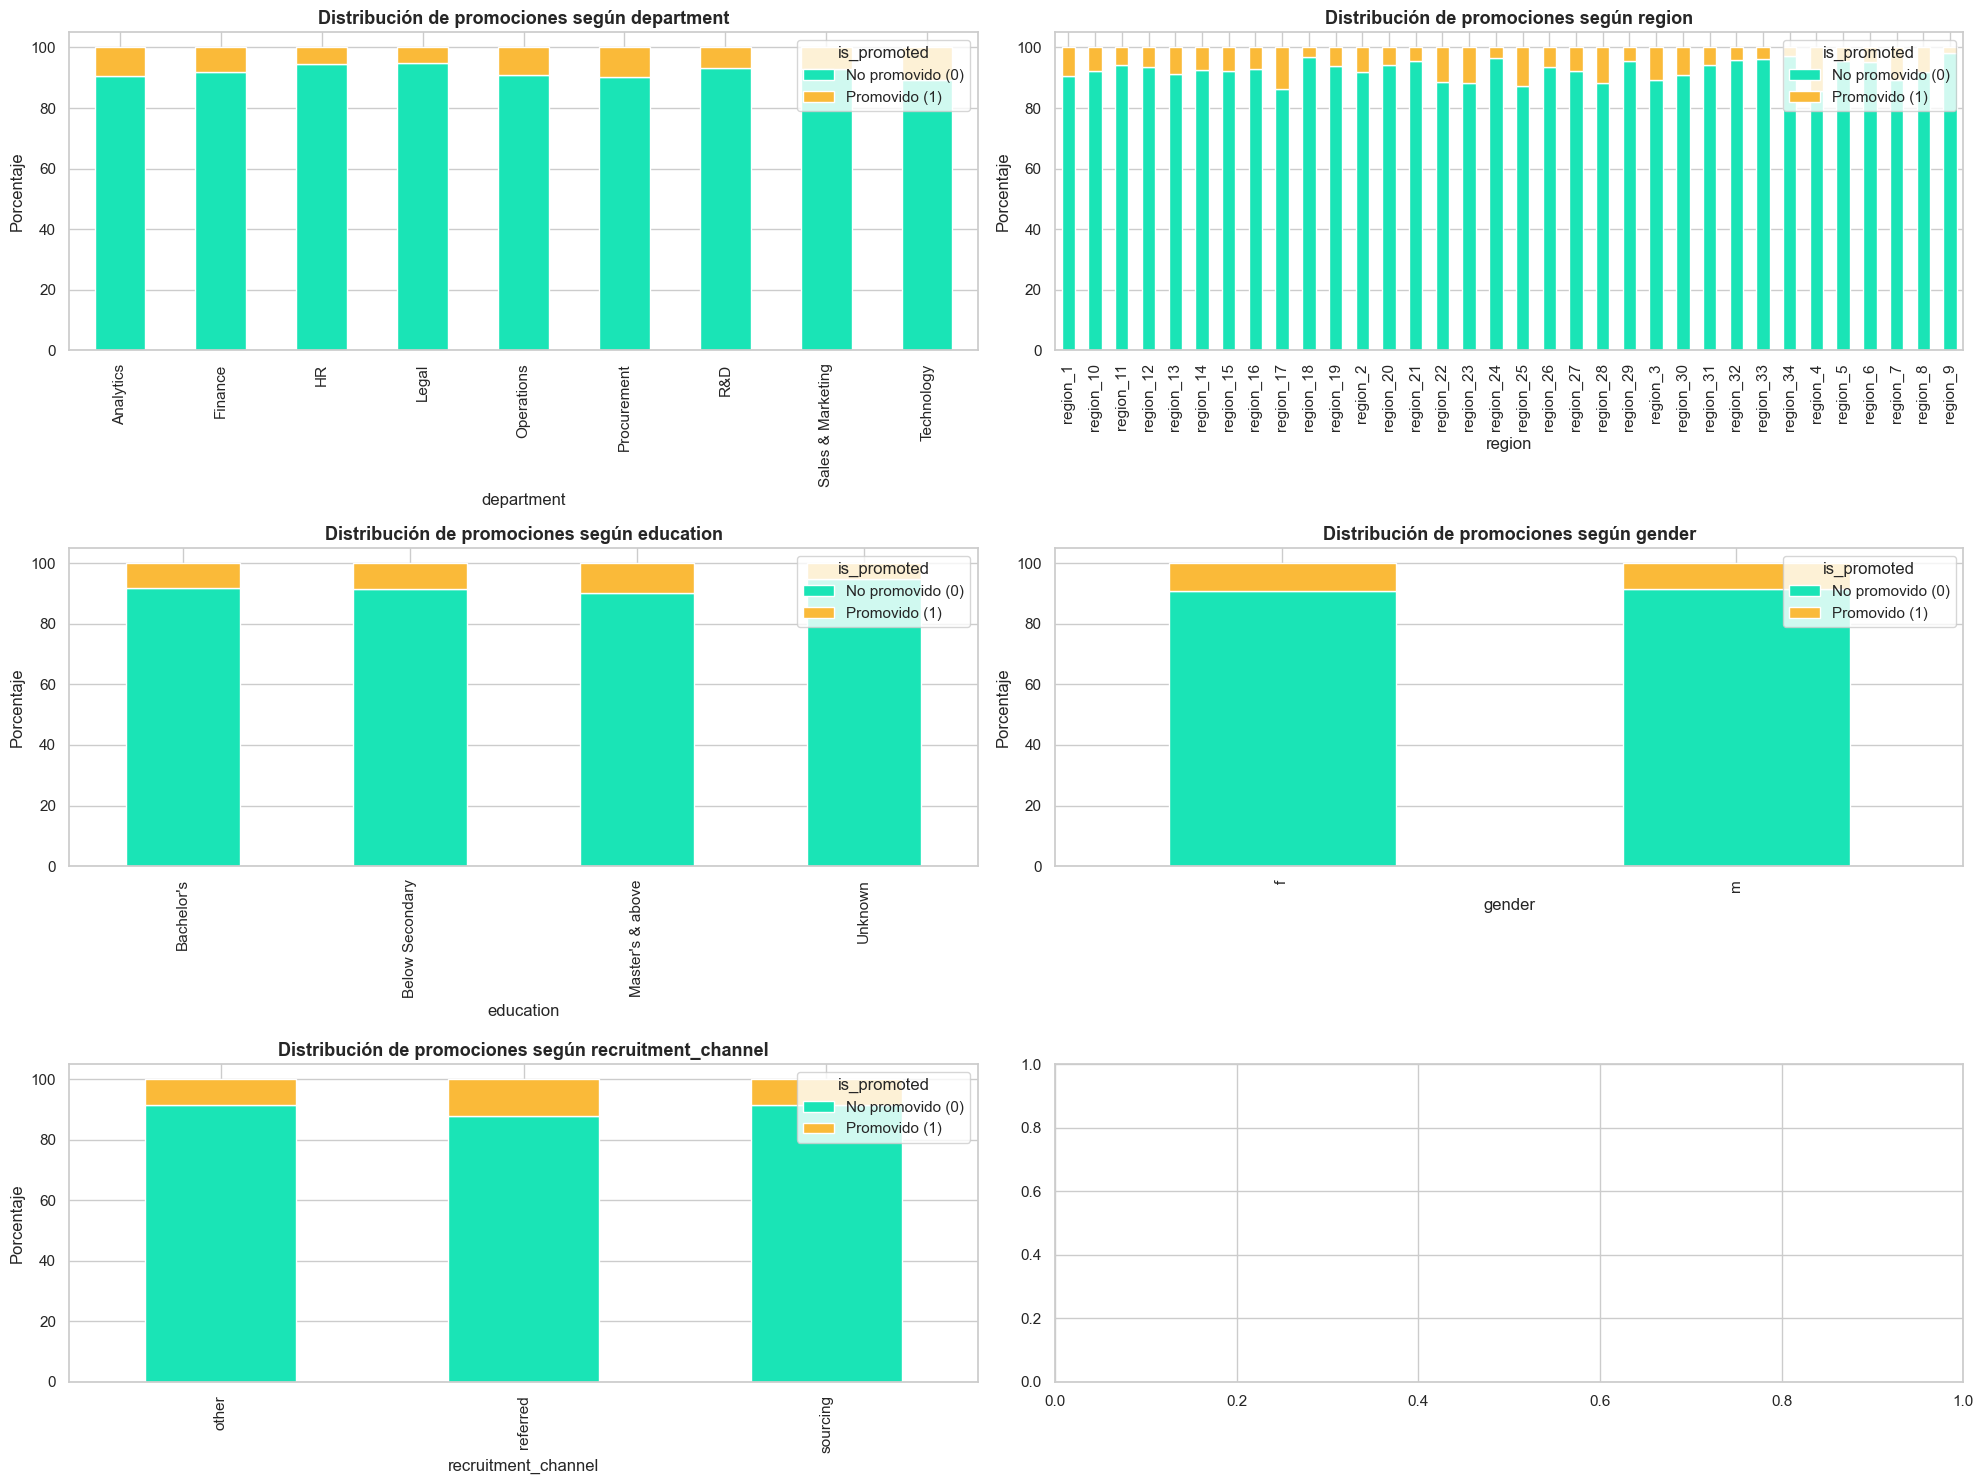

In [25]:
# ====================================================
# AED de variables categóricas respecto a is_promoted
# ====================================================


fig, axes = plt.subplots(3, 2, figsize=(20, 15))
# Definir colores consistentes con la paleta "turbo"
colors = sns.color_palette("turbo", 2)

for i, col in enumerate(categorical_cols):
    # Tabla cruzada normalizada por fila (en %)
    prop = (pd.crosstab(data_train[col], data_train['is_promoted'], normalize='index') * 100)
    
    # Gráfico apilado
    prop.plot(kind='bar', stacked=True, ax=axes[i // 2, i % 2], color=colors)
    
    # Estética
    axes[i // 2, i % 2].set_title(f"Distribución de promociones según {col}", fontsize=13, fontweight="bold")
    axes[i // 2, i % 2].set_ylabel("Porcentaje")
    axes[i // 2, i % 2].set_xlabel(col)
    axes[i // 2, i % 2].legend(title="is_promoted", labels=["No promovido (0)", "Promovido (1)"], loc="upper right")

plt.tight_layout()
plt.show()



El análisis exploratorio sobre las variables categóricas muestra las siguientes tendencias en relación con la probabilidad de promoción:

- **Department**:  
  La proporción de promociones es relativamente similar en la mayoría de los departamentos. Sin embargo, departamentos como *Operations* y *Sales & Marketing* concentran más empleados y, en consecuencia, más casos de promociones.

- **Region**:  
  No se observan grandes diferencias entre regiones. La distribución es bastante homogénea y la proporción de promociones se mantiene baja en casi todas ellas.

- **Education**:  
  Los empleados con *Master’s & above* muestran una proporción ligeramente más alta de promociones en comparación con aquellos con *Bachelor’s* o *Below Secondary*. Esto sugiere que el nivel educativo puede tener un efecto moderado.

- **Gender**:  
  No se aprecia una diferencia significativa en las tasas de promoción entre hombres y mujeres, lo que indica que la variable género no es un factor determinante en este dataset.

- **Recruitment Channel**:  
  Los empleados reclutados por el canal *referred* parecen tener una proporción de promociones ligeramente mayor que los que ingresaron por *other* o *sourcing*. Esto podría indicar que las referencias internas influyen positivamente en las


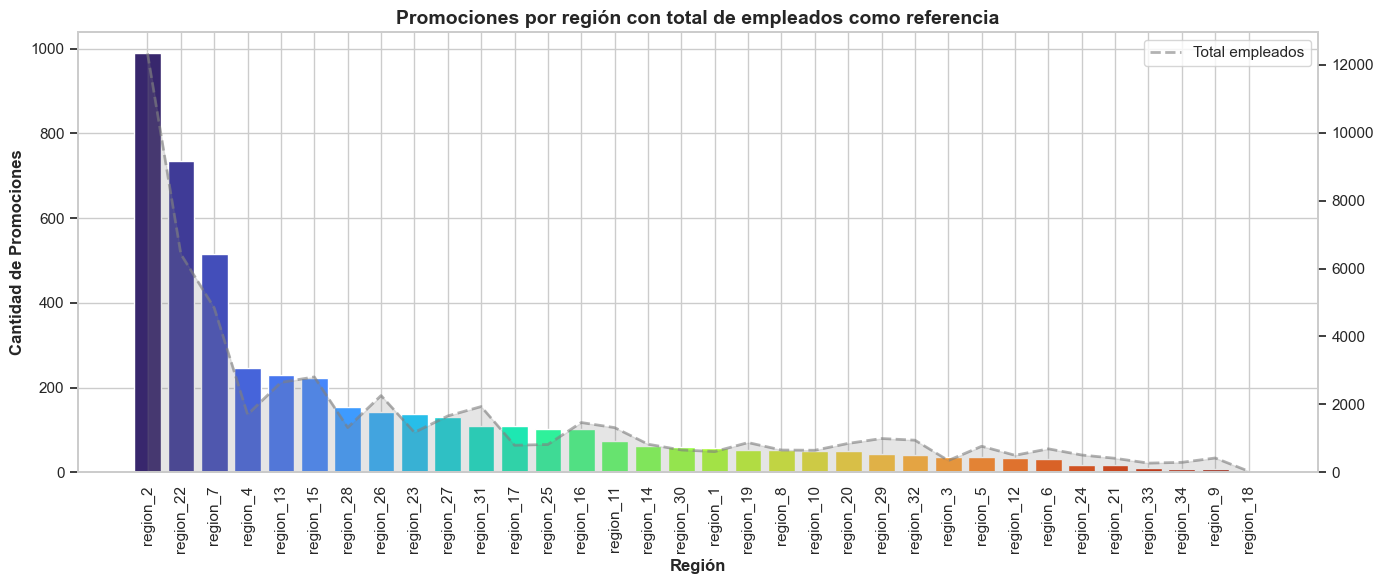

In [26]:
# ================================================
# Promociones por región vs total empleados (alineados en cero y sin grid secundario)
# ================================================

# Conteo de promovidos por región
promoted_by_region = data_train[data_train['is_promoted'] == 1]['region'].value_counts()

# Conteo total de empleados por región
total_by_region = data_train['region'].value_counts()

# Unir en un DataFrame
region_df = pd.DataFrame({
    'Promoted': promoted_by_region,
    'Total': total_by_region
}).fillna(0)

# Reordenar por cantidad de promovidos
region_df = region_df.sort_values('Promoted', ascending=False)

# Gráfico
fig, ax1 = plt.subplots(figsize=(14, 6))

# Posiciones en X
x = np.arange(len(region_df))

# Barras principales - promovidos
bars = ax1.bar(x, region_df['Promoted'], color=sns.color_palette("turbo", len(region_df)))
ax1.set_ylabel("Cantidad de Promociones", fontsize=12, fontweight="bold")
ax1.set_xlabel("Región", fontsize=12, fontweight="bold")
ax1.set_xticks(x)
ax1.set_xticklabels(region_df.index, rotation=90)

# Eje secundario - total empleados
ax2 = ax1.twinx()
ax2.plot(x, region_df['Total'], color="gray", linestyle="--", linewidth=2, alpha=0.6, label="Total empleados")
ax2.fill_between(x, region_df['Total'], color="gray", alpha=0.2)

# Alinear ceros
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)

# Quitar grid del eje secundario
ax2.grid(False)

# Título y leyenda
plt.title("Promociones por región con total de empleados como referencia", fontsize=14, fontweight="bold")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()




El gráfico muestra la distribución de promociones a nivel regional en términos absolutos, con una comparación frente al tamaño total de la plantilla de cada región:

- Las **barras de colores** representan la cantidad de empleados promovidos (`is_promoted = 1`) en cada región.  
- La **línea gris con sombra** en el eje secundario muestra el **total de empleados** por región, funcionando como referencia para entender el volumen relativo.  
- El orden de las regiones está dado de mayor a menor cantidad de promociones.  

###  Observaciones:
1. **Regiones con mayor volumen**: *region_2* y *region_22* concentran tanto la mayor cantidad de empleados como la mayor cantidad de promociones.  
2. **Efecto del tamaño de la región**: en regiones más pequeñas, el número de promociones también disminuye de manera proporcional al total de empleados.  
3. **Concentración desigual**: unas pocas regiones acumulan la mayoría de los ascensos, lo que sugiere que la variable *region* podría aportar información relevante al modelo.  
.


C:\Users\jlvar\AppData\Local\Temp\ipykernel_16252\3478026342.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


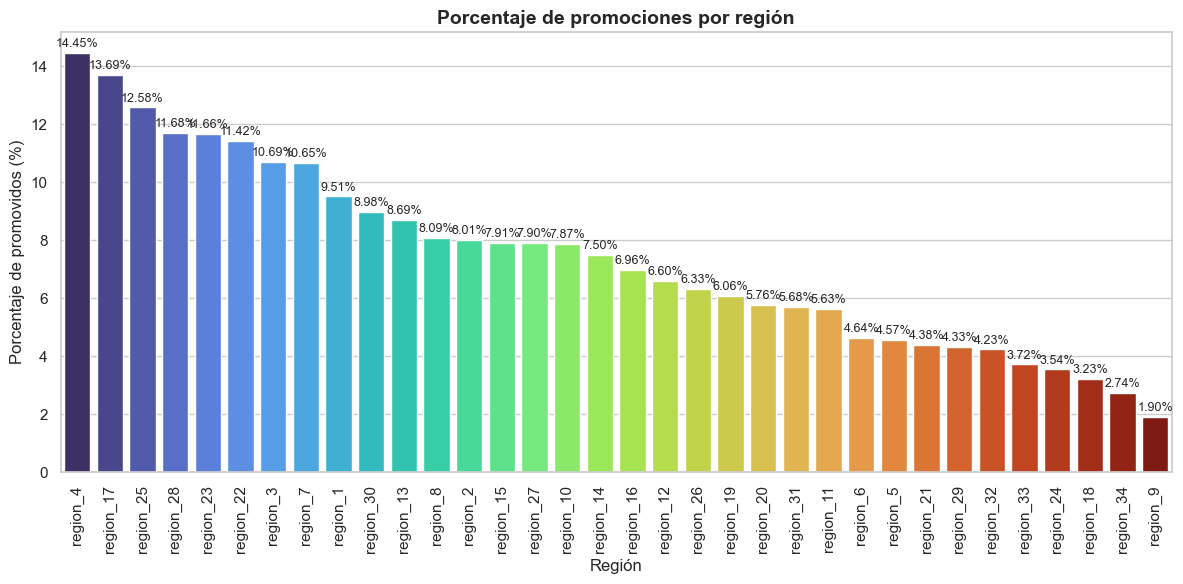

In [27]:
# =========================================================
# Porcentaje de promociones por región
# =========================================================

# Calcular porcentaje de promovidos por región
prom_by_region = (
    data_train.groupby("region")["is_promoted"]
    .mean() * 100   # promedio = proporción de 1's
)

# Ordenar de mayor a menor
prom_by_region = prom_by_region.sort_values(ascending=False)

# Graficar
plt.figure(figsize=(12,6))
sns.barplot(
    x=prom_by_region.index, 
    y=prom_by_region.values, 
    palette="turbo"
)

# Estética
plt.xticks(rotation=90)
plt.ylabel("Porcentaje de promovidos (%)")
plt.xlabel("Región")
plt.title("Porcentaje de promociones por región", fontsize=14, fontweight="bold")

# Etiquetas en cada barra
for i, val in enumerate(prom_by_region.values):
    plt.text(i, val + 0.1, f"{val:.2f}%", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


C:\Users\jlvar\AppData\Local\Temp\ipykernel_16252\2949744090.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promotion_rate, x="gender", y="is_promoted", palette=colors, ax=axes[1,0])


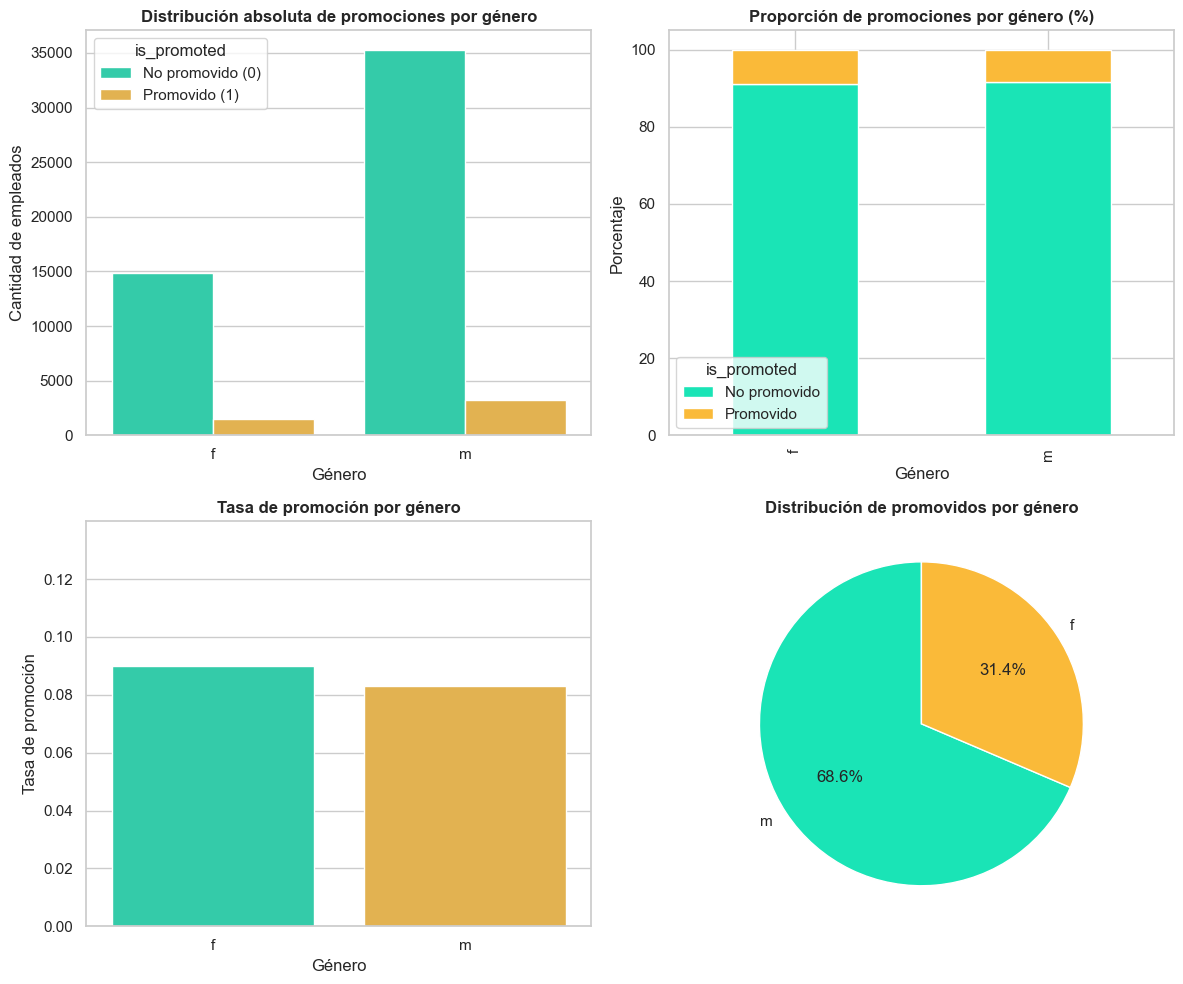

In [28]:
# ================================================
# Grid 2x2 de gráficas: gender vs is_promoted
# ================================================

colors = sns.color_palette("turbo", 2)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Conteo absoluto de promociones por género
sns.countplot(data=data_train, x="gender", hue="is_promoted", palette=colors, ax=axes[0,0])
axes[0,0].set_title("Distribución absoluta de promociones por género", fontsize=12, fontweight="bold")
axes[0,0].set_xlabel("Género")
axes[0,0].set_ylabel("Cantidad de empleados")
axes[0,0].legend(title="is_promoted", labels=["No promovido (0)", "Promovido (1)"])


# 2. Proporción de promociones por género
prop = (pd.crosstab(data_train['gender'], data_train['is_promoted'], normalize='index') * 100)
prop.plot(kind='bar', stacked=True, color = colors, ax=axes[0,1])
axes[0,1].set_title("Proporción de promociones por género (%)", fontsize=12, fontweight="bold")
axes[0,1].set_ylabel("Porcentaje")
axes[0,1].set_xlabel("Género")
axes[0,1].legend(title="is_promoted", labels=["No promovido", "Promovido"])


# 3. Tasa de promoción por género
promotion_rate = data_train.groupby("gender")["is_promoted"].mean().reset_index()
sns.barplot(data=promotion_rate, x="gender", y="is_promoted", palette=colors, ax=axes[1,0])
axes[1,0].set_title("Tasa de promoción por género", fontsize=12, fontweight="bold")
axes[1,0].set_ylabel("Tasa de promoción")
axes[1,0].set_xlabel("Género")
axes[1,0].set_ylim(0, promotion_rate['is_promoted'].max() + 0.05)


# 4. Pie chart - distribución de promovidos por género
promotion_counts = data_train[data_train['is_promoted'] == 1]['gender'].value_counts()
promotion_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors, ax=axes[1,1])
axes[1,1].set_title("Distribución de promovidos por género", fontsize=12, fontweight="bold")
axes[1,1].set_ylabel("")


# Ajustar diseño
plt.tight_layout()
plt.show()


### Análisis de `gender` vs. `is_promoted`

El análisis de la relación entre el género y la variable objetivo `is_promoted` ofrece las siguientes conclusiones:

1. **Distribución absoluta**  
   - La mayoría de los empleados en el dataset son hombres, lo cual se refleja en un mayor número absoluto de promociones para este grupo.  
   - Sin embargo, esta diferencia está influenciada principalmente por el tamaño de la población masculina en la muestra.  

2. **Proporción de promociones (%)**  
   - Al comparar porcentajes dentro de cada género, se observa que las tasas de promoción son relativamente **similares** entre hombres y mujeres.  
   - Esto indica que, en términos relativos, ambos géneros tienen **oportunidades comparables** de promoción.  

3. **Tasa de promoción por género**  
   - Las mujeres presentan una **ligera ventaja porcentual** en la tasa de promoción frente a los hombres.  
   - Aun así, la diferencia es pequeña y no suficiente para señalar un sesgo estadísticamente fuerte a favor de algún género.  

4. **Distribución de promovidos**  
   - Entre quienes fueron promovidos, aproximadamente **dos tercios son hombres** y un tercio son mujeres.  
   - Esto refleja nuevamente la **desigualdad en la composición de la plantilla**, más que una diferencia significativa en el acceso a promociones.

###  Perspectiva ética sobre género en la promoción

- Aunque el dataset no evidencia un sesgo claro en el proceso de promoción, sí pone en relieve un desequilibrio estructural en la fuerza laboral, con predominio de hombres sobre mujeres.  
- Desde la perspectiva de equidad de género en recursos humanos, es importante no solo asegurar igualdad de condiciones en la promoción, sino también trabajar en incrementar la participación de mujeres en la organización para garantizar una representación más balanceada.  
- El monitoreo constante de estas métricas es esencial para prevenir sesgos ocultos en el tiempo y fomentar políticas de inclusión más robustas.




### 3 - Preprocesamiento de Datos

En esta sección abordaremos los pasos clave para preparar nuestros datos antes del modelado.  

1. **Feature Engineering**  
   - Crearemos nuevas variables a partir de las existentes con el fin de capturar mejor la información relevante.  
   - Ejemplos:  
     - `potential_region`: identifica si un empleado pertenece a una región con alta tasa de promociones.  
     - `performance_level`: combina desempeño histórico (`previous_year_rating`), cumplimiento de KPIs y logros (`awards_won?`).  
     - `High_Avg_Tscore`: etiqueta a los empleados con puntajes de entrenamiento altos en función de un umbral definido.  

2. **Codificación de Variables Categóricas**  
   - Dado que los modelos de machine learning trabajan con valores numéricos, convertiremos las variables categóricas como `department`, `education`, `region`, `gender`, `recruitment_channel` en representaciones numéricas.  
   - Dependiendo de la naturaleza de cada variable se aplicará **One-Hot Encoding** o **Label Encoding**.  

3. **Estandarización de Variables Numéricas**  
   - Para evitar que variables en diferentes escalas distorsionen el entrenamiento de los modelos, aplicaremos una transformación que normalice sus valores.  
   - Utilizaremos **StandardScaler**, que transforma los datos para que tengan media 0 y desviación estándar 1.  
   - Esto es especialmente importante para modelos sensibles a la escala (ej. regresión logística, SVM, KNN), aunque también puede aportar estabilidad en otros algoritmos.  

👉 Con estos pasos dejamos listo nuestro dataset para pasar a la fase de modelado.


In [29]:
data_cat.head()

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other


In [30]:
data_num.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,1.0,35.0,5.0,8.0,1.0,0.0,49.0,0.0
1,1.0,30.0,5.0,4.0,0.0,0.0,60.0,0.0
2,1.0,34.0,3.0,7.0,0.0,0.0,50.0,0.0
3,2.0,39.0,1.0,10.0,0.0,0.0,50.0,0.0
4,1.0,45.0,3.0,2.0,0.0,0.0,73.0,0.0


In [31]:
# ================================================
# Unir variables categóricas y numéricas
# ================================================

# Resetear índices para evitar problemas de alineación
data_cat = data_cat.reset_index(drop=True)
data_num = data_num.reset_index(drop=True)

# Concatenar por columnas (axis=1)
data_full = pd.concat([data_num, data_cat], axis=1)

# Verificar dimensiones
print("Shape del nuevo DataFrame:", data_full.shape)
data_full.head()

Shape del nuevo DataFrame: (54808, 13)


,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department,region,education,gender,recruitment_channel
0,1.0,35.0,5.0,8.0,1.0,0.0,49.0,0.0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,1.0,30.0,5.0,4.0,0.0,0.0,60.0,0.0,Operations,region_22,Bachelor's,m,other
2,1.0,34.0,3.0,7.0,0.0,0.0,50.0,0.0,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,2.0,39.0,1.0,10.0,0.0,0.0,50.0,0.0,Sales & Marketing,region_23,Bachelor's,m,other
4,1.0,45.0,3.0,2.0,0.0,0.0,73.0,0.0,Technology,region_26,Bachelor's,m,other


### Creación de la variable `potential_region`  

Esta celda solo es un ejemplo de como se hace la transformación, pero realmente mas adelante definiremos un transformados que permita agregar a un pipeline para que cuando entren nuevos datos se calcule autonamaticamente el valor para cada uno.
En esta sección transformamos la variable categórica **`region`** en una nueva característica más informativa llamada **`potential_region`**, con el fin de capturar el nivel de probabilidad de promoción asociado a cada región.  

**Pasos realizados:**  
1. **Cálculo de la tasa de promoción por región**  
   - Se calcula el porcentaje promedio de empleados promovidos dentro de cada región.  

2. **Segmentación en percentiles**  
   - Usamos `qcut` para dividir las regiones en **4 categorías de potencial**:  
     - `1 = Potencial alto`  
     - `2 = Potencial medio-alto`  
     - `3 = Potencial medio-bajo`  
     - `4 = Potencial bajo`  

3. **Mapeo de regiones a categorías**  
   - Cada región se asigna a una de estas 4 categorías en función de su tasa de promoción.  

4. **Construcción del DataFrame `data_map`**  
   - Contiene dos columnas:  
     - `region`: la región original.  
     - `potential_region`: la categoría de potencial asignada.  

Este procedimiento permite **reducir la cardinalidad** de la variable `region` y, al mismo tiempo, **preservar información relevante** sobre el impacto de la ubicación en las promociones.  


In [32]:
# =========================================================
# Crear variable potential_region a partir de la tasa de promoción
# =========================================================

# 1. Calcular % de promovidos por región
prom_by_region = data_full.groupby("region")["is_promoted"].mean()

# 2. Dividir en 4 grupos según percentiles
region_potential = pd.qcut(prom_by_region, 4, labels=[4, 3, 2, 1])  
# Nota: 1 = potencial alto, 4 = potencial bajo

# 3. Mapear cada región a su categoría
region_map = region_potential.to_dict()

# Crear un DataFrame con region y su potencial
data_map = pd.DataFrame({
    "region": data_cat["region"],
    "potential_region": data_cat["region"].map(region_map)
})

# Ver primeras filas
print(data_map.head())


      region  potential_region
0   region_7                 1
1  region_22                 1
2  region_19                 3
3  region_23                 1
4  region_26                 3


### ¿Qué es un *Pipeline* en Machine Learning?  

Un **pipeline** es una herramienta de *scikit-learn* que permite **encadenar y automatizar** los pasos necesarios en un flujo de *machine learning*.  
En lugar de aplicar manualmente cada transformación y luego entrenar el modelo, un pipeline organiza todas las etapas en una secuencia clara y reproducible.  

####  Ventajas principales:
1. **Reproducibilidad**  
   - Se asegura que el mismo proceso de preprocesamiento y modelado se aplique siempre, tanto en entrenamiento como en prueba o en producción.  

2. **Evita fuga de datos (*data leakage*)**  
   - Los pasos de transformación (como escalado, imputación o codificación) se ajustan solo con el *training set* y luego se aplican al *test set*.  

3. **Simplicidad y limpieza del código**  
   - Todas las operaciones se encapsulan en un único objeto (`Pipeline`), reduciendo errores y facilitando la implementación.  

4. **Integración con validación cruzada y GridSearchCV**  
   - Se pueden optimizar hiperparámetros de los modelos sin perder el control del flujo de datos.  


El pipeline actúa como una **línea de producción automatizada**, donde los datos entran “crudos” y salen listos para la predicción.  


### Pipeline con separación Train/Test  

En esta sección preparamos los datos para el entrenamiento de los modelos de clasificación, siguiendo un flujo ordenado y reproducible:  

1. **Separación de variables**  
   - `X`: contiene todas las características (features) excepto la variable objetivo.  
   - `y`: corresponde a la variable objetivo `is_promoted`.  

2. **División en entrenamiento y prueba**  
   - Usamos un **split 80/20** estratificado para garantizar que la proporción de empleados promovidos y no promovidos se mantenga en ambos conjuntos.  
   - `X_train, y_train` → utilizados para el entrenamiento y validación cruzada.  
   - `X_test, y_test` → reservados exclusivamente para la evaluación final.  

3. **Feature Engineering con `PotentialRegionTransformer`**  
   - La variable categórica `region` es reemplazada por una nueva columna `potential_region`.  
   - Esta variable refleja el **nivel de potencial de promoción de cada región**, calculado a partir del porcentaje histórico de empleados promovidos:  
     - `1 = Alto potencial`  
     - `2 = Medio-alto`  
     - `3 = Medio-bajo`  
     - `4 = Bajo potencial`  
   - Con esto simplificamos `region` en una variable numérica más informativa para el modelo.  

4. **Definición de transformaciones**  
   - **Escalado numérico** con `StandardScaler`, para normalizar las variables numéricas y facilitar la convergencia de los algoritmos.  
   - **Codificación categórica** con `OneHotEncoder`, que convierte variables categóricas en vectores binarios, permitiendo que los modelos numéricos trabajen con ellas.  

5. **Construcción del `ColumnTransformer` dinámico**  
   - Se usa `make_column_selector` para detectar automáticamente columnas por tipo de dato:  
     - Variables numéricas → `StandardScaler`.  
     - Variables categóricas → `OneHotEncoder`.  
   - Este preprocesador garantiza que, tras la ingeniería de características, cada tipo de variable reciba el tratamiento adecuado.  

Con este esquema garantizamos que los datos pasen siempre por el mismo flujo de transformación:  
1) primero se enriquecen con la nueva variable `potential_region`,  
2) luego se estandarizan y codifican según corresponda,  
3) y finalmente se entregan listos al modelo para el entrenamiento y la evaluación.  

In [33]:
# ================================================
# Pipeline con separación Train/Test
# ================================================

# 1. Separar features (X) y target (y)
#    - Eliminamos la columna objetivo 'is_promoted' de X
#    - Guardamos la variable objetivo en y
X = data_full.drop(columns=["is_promoted"])
y = data_full["is_promoted"]

# 2. División en train/test (80/20 estratificado)
#    - Separamos los datos en entrenamiento (80%) y prueba (20%)
#    - Usamos stratify=y para que se mantenga la proporción de clases
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

# Verificar tamaños de los conjuntos resultantes
print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de prueba:", X_test.shape)


# 3. Definir transformador personalizado para 'region'
class PotentialRegionTransformer(BaseEstimator, TransformerMixin):
    """
    Transformador que reemplaza la variable categórica 'region'
    por una nueva variable 'potential_region' basada en el % de promociones.

    - fit(X, y): calcula la tasa de promoción por región usando y (target).
    - transform(X): asigna a cada empleado una categoría (1-4) según el cuartil
      en el que se encuentra su región:
        1 = Alto potencial
        2 = Medio-alto
        3 = Medio-bajo
        4 = Bajo potencial
      Finalmente elimina la columna original 'region'.
    """
    def fit(self, X, y):
        # Construir DataFrame con región y target
        tmp = pd.DataFrame({"region": X["region"], "target": y})
        prom_rates = tmp.groupby("region")["target"].mean()
        
        # Guardar mapping región -> cuartil (diccionario)
        self.region_map_ = pd.qcut(prom_rates, 4, labels=[4, 3, 2, 1]).to_dict()
        return self

    def transform(self, X):
        X = X.copy()
        # Crear nueva columna en base al mapping calculado en fit()
        X["potential_region"] = X["region"].map(self.region_map_)
        # Eliminar columna original
        X = X.drop(columns=["region"])
        return X


# Instancia del transformador personalizado
potential_region_transformer = PotentialRegionTransformer()


# 4. Definir preprocesamiento con ColumnTransformer
#    - Escalado para variables numéricas
#    - One-hot encoding para variables categóricas
#    - Las columnas se seleccionan automáticamente por tipo de dato
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), make_column_selector(dtype_include=["int64", "float64"])),
        ("cat", OneHotEncoder(handle_unknown="ignore"), make_column_selector(dtype_include=["object"]))
    ]
)

Tamaño de entrenamiento: (43846, 12)
Tamaño de prueba: (10962, 12)


### Función `evaluar_modelo`  

En esta sección definimos una **función** llamada `evaluar_modelo`, que nos permite evaluar de forma estandarizada el rendimiento de cualquier modelo de clasificación.  

**¿Qué es una función en Python?**  
Una función es un bloque de código reutilizable que realiza una tarea específica.  
- Se define con `def nombre_funcion():`.  
- Puede recibir **parámetros de entrada** (datos a procesar).  
- Puede devolver un **resultado** o ejecutar acciones.  
- Nos ayuda a **no repetir código**, hacerlo más organizado y fácil de mantener.  

### ¿Qué hace `evaluar_modelo`?

1. **Predicciones**  
   - Genera las etiquetas predichas (`y_pred`) y las probabilidades de la clase positiva (`y_proba`).  

2. **Cálculo de métricas**  
   - Muestra un reporte de clasificación con **Precisión, Recall, F1 y Accuracy** para cada clase (`0 = no promovido`, `1 = promovido`).  
   - Calcula también el **ROC-AUC**, métrica clave para evaluar modelos desbalanceados.  

3. **Visualización de resultados**  
   - **Matriz de confusión** → muestra en un gráfico cuántos casos fueron correctamente clasificados y dónde se cometieron errores.  
   - **Curva ROC** → representa la sensibilidad frente a la tasa de falsos positivos, junto con el valor de AUC.  


### Utilidad  
Esta función centraliza todo el análisis en un único bloque, lo que:  
- Facilita la comparación entre diferentes modelos.  
- Garantiza consistencia en la evaluación.  
- Combina métricas numéricas con visualizaciones para una interpretación más clara.  


In [35]:

def evaluar_modelo(model, X_test, y_test, nombre="Modelo"):
    """
    Evalúa un modelo entrenado mostrando:
    1. Métricas globales y por clase (Precision, Recall, F1, Accuracy).
    2. Matriz de confusión.
    3. Curva ROC con AUC.
    
    Parámetros:
    - model: pipeline o modelo entrenado
    - X_test, y_test: datos de prueba
    - nombre: str, nombre del modelo para títulos
    """
    # ==============================
    # 1. Predicciones
    # ==============================
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # prob. clase positiva (1)

    # ==============================
    # 2. Métricas
    # ==============================
    print(f"\n🔎 Resultados para {nombre}\n" + "="*40)
    print("📊 Reporte de clasificación:\n")
    print(classification_report(y_test, y_pred, target_names=["No promovido (0)", "Promovido (1)"]))
    
    auc = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC: {auc:.4f}")

    # ==============================
    # 3. Visualización
    # ==============================
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues", ax=axes[0], colorbar=False)
    axes[0].set_title(f"Matriz de Confusión - {nombre}")

    # Curva ROC / AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    axes[1].plot(fpr, tpr, label=f"AUC = {auc:.3f}", color="darkorange")
    axes[1].plot([0, 1], [0, 1], linestyle="--", color="gray")
    axes[1].set_title(f"Curva ROC - {nombre}")
    axes[1].set_xlabel("False Positive Rate")
    axes[1].set_ylabel("True Positive Rate")
    axes[1].legend(loc="lower right")

    plt.tight_layout()
    plt.show()


###  Curva ROC y AUC  

La **Curva ROC (Receiver Operating Characteristic)** es una herramienta de evaluación muy utilizada en problemas de clasificación binaria.  
Su objetivo es mostrar el rendimiento del modelo en diferentes umbrales de decisión.  

#### ¿Cómo se construye la curva ROC?

- En el eje **X** se grafica la **Tasa de Falsos Positivos (FPR)**:  
  \[
  FPR = \frac{\text{Falsos Positivos (FP)}}{\text{Falsos Positivos (FP)} + \text{Verdaderos Negativos (TN)}}
  \]

- En el eje **Y** se grafica la **Tasa de Verdaderos Positivos (TPR o Recall)**:  
  \[
  TPR = \frac{\text{Verdaderos Positivos (TP)}}{\text{Verdaderos Positivos (TP)} + \text{Falsos Negativos (FN)}}
  \]

- Cada punto en la curva representa un **umbral de probabilidad distinto**, usado para decidir si una instancia se clasifica como positiva.

#### Interpretación de la curva ROC
- Una curva más cercana a la esquina superior izquierda indica **mejor desempeño** del modelo.  
- Una diagonal perfecta (línea gris de referencia) indica un **modelo aleatorio** sin capacidad de discriminación.  


#### AUC (Área Bajo la Curva)
El **AUC (Area Under the Curve)** mide el área total bajo la curva ROC.  
- **AUC = 1.0** → Modelo perfecto.  
- **AUC = 0.5** → Modelo sin capacidad predictiva (equivalente a adivinar).  
- **0.7 ≤ AUC < 0.8** → Rendimiento aceptable.  
- **0.8 ≤ AUC < 0.9** → Modelo bueno.  
- **AUC ≥ 0.9** → Modelo excelente.  


###  Comparación de Modelos con Validación Cruzada y Matrices de Confusión  

En esta sección evaluamos distintos algoritmos de clasificación para predecir la promoción de empleados. El proceso seguido es el siguiente:  

1. **Modelos considerados**  
   - **Regresión Logística** → como modelo base lineal.  
   - **Random Forest** → ensamble de árboles de decisión.  
   - **Gradient Boosting** → implementación clásica de boosting en *scikit-learn*.  
   - **SVM (Support Vector Machine)** → modelo que busca maximizar el margen de separación entre clases.  
   - **XGBoost** → variante optimizada de *Gradient Boosting* ampliamente usada en competiciones de ML.  

2. **Métrica de evaluación**  
   - Usamos F1-score de la clase minoritaria (`is_promoted = 1`) como métrica principal.  
   - Esto asegura que los modelos se enfoquen en identificar correctamente a los empleados promovidos, que representan una minoría en el dataset.  

3. **Metodología**  
   - Se construye un pipeline para cada modelo que incluye:  
     - Preprocesamiento (escalado de numéricas y codificación *one-hot* de categóricas).  
     - El clasificador correspondiente.  
   - Se aplica validación cruzada (cv=5) sobre el conjunto de entrenamiento (`X_train`).  
   - Se calculan el promedio y la desviación estándar del F1-score de la clase minoritaria.  

4. **Evaluación final en `X_test`**  
   - Después de la validación cruzada, cada modelo se reentrena sobre todo el conjunto de entrenamiento para aprovechar al máximo la información disponible.  
   - Finalmente, se generan predicciones en `X_test` y se grafica la matriz de confusión, lo que permite analizar visualmente los aciertos y errores en clasificación.  

Con este análisis se busca identificar qué modelo ofrece el mejor equilibrio entre precisión y recall para la clase minoritaria, asegurando una predicción más confiable de los casos de promoción.  


Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'department',
       'region', 'education', 'gender', 'recruitment_channel'],
      dtype='object')
is_promoted
LogisticRegression: 0.3890 (+/- 0.0133)

🔎 Resultados para Matriz de confusión - LogisticRegression
📊 Reporte de clasificación:

                  precision    recall  f1-score   support

No promovido (0)       0.94      0.99      0.96     10028
   Promovido (1)       0.81      0.26      0.40       934

        accuracy                           0.93     10962
       macro avg       0.87      0.63      0.68     10962
    weighted avg       0.92      0.93      0.92     10962

ROC-AUC: 0.8748


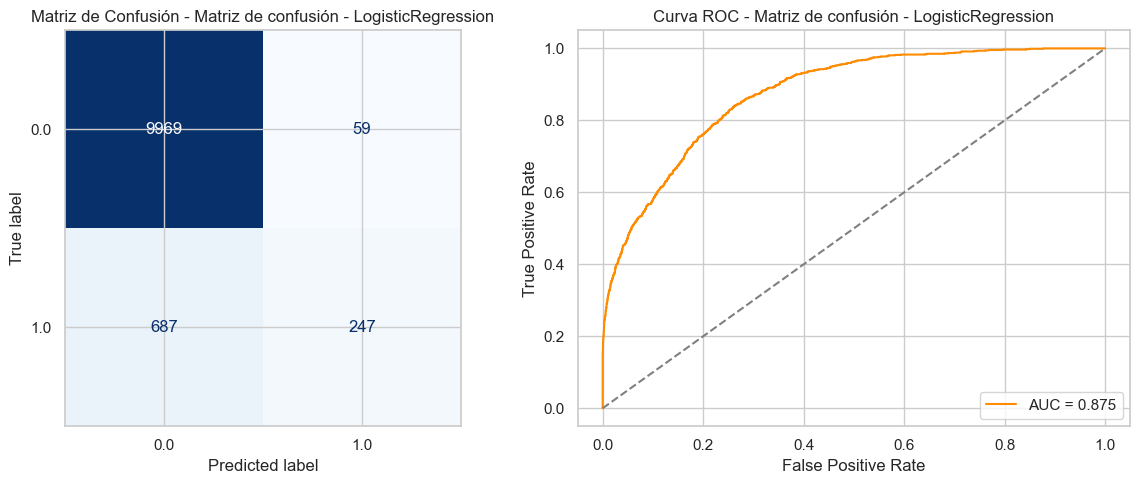

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'department',
       'region', 'education', 'gender', 'recruitment_channel'],
      dtype='object')
is_promoted
RandomForest: 0.4594 (+/- 0.0152)

🔎 Resultados para Matriz de confusión - RandomForest
📊 Reporte de clasificación:

                  precision    recall  f1-score   support

No promovido (0)       0.94      0.99      0.97     10028
   Promovido (1)       0.82      0.32      0.46       934

        accuracy                           0.94     10962
       macro avg       0.88      0.66      0.72     10962
    weighted avg       0.93      0.94      0.92     10962

ROC-AUC: 0.8748


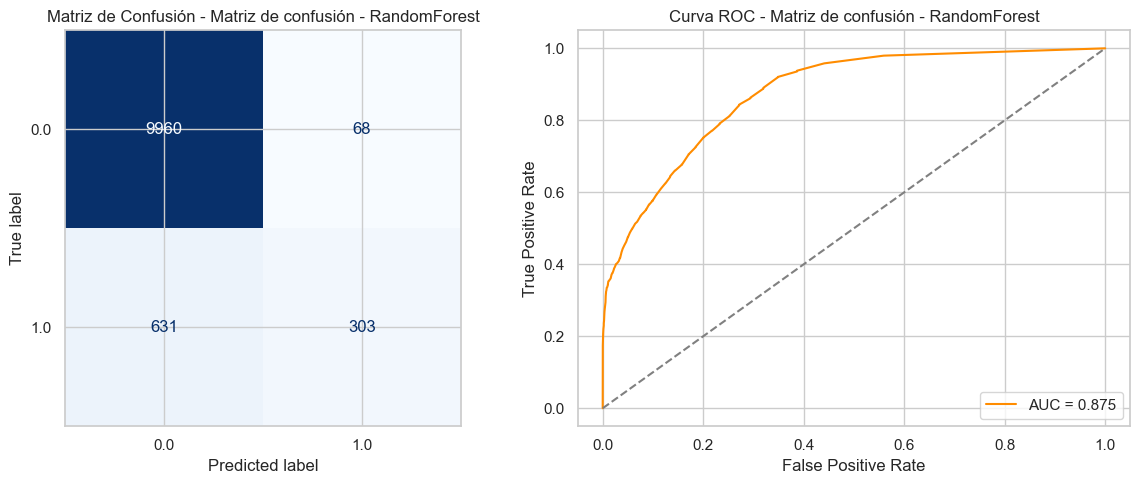

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'department',
       'region', 'education', 'gender', 'recruitment_channel'],
      dtype='object')
is_promoted
GradientBoosting: 0.4620 (+/- 0.0121)

🔎 Resultados para Matriz de confusión - GradientBoosting
📊 Reporte de clasificación:

                  precision    recall  f1-score   support

No promovido (0)       0.94      1.00      0.97     10028
   Promovido (1)       0.97      0.30      0.46       934

        accuracy                           0.94     10962
       macro avg       0.95      0.65      0.71     10962
    weighted avg       0.94      0.94      0.92     10962

ROC-AUC: 0.9082


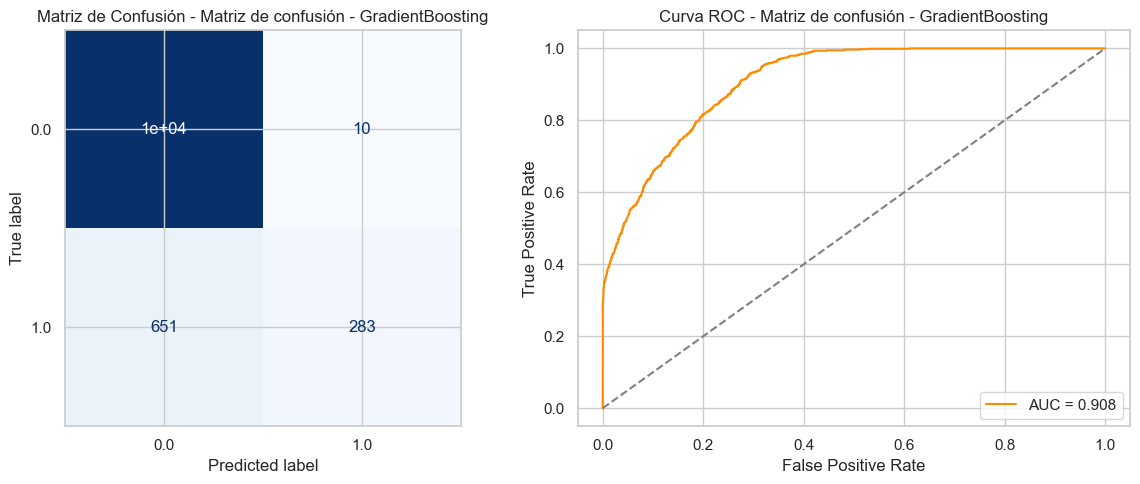

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'department',
       'region', 'education', 'gender', 'recruitment_channel'],
      dtype='object')
is_promoted


c:\Users\jlvar\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:36:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\jlvar\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:36:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\jlvar\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:36:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\jlvar\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:36:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

XGBoost: 0.5057 (+/- 0.0135)


c:\Users\jlvar\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:36:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔎 Resultados para Matriz de confusión - XGBoost
📊 Reporte de clasificación:

                  precision    recall  f1-score   support

No promovido (0)       0.94      1.00      0.97     10028
   Promovido (1)       0.95      0.35      0.51       934

        accuracy                           0.94     10962
       macro avg       0.95      0.67      0.74     10962
    weighted avg       0.94      0.94      0.93     10962

ROC-AUC: 0.9112


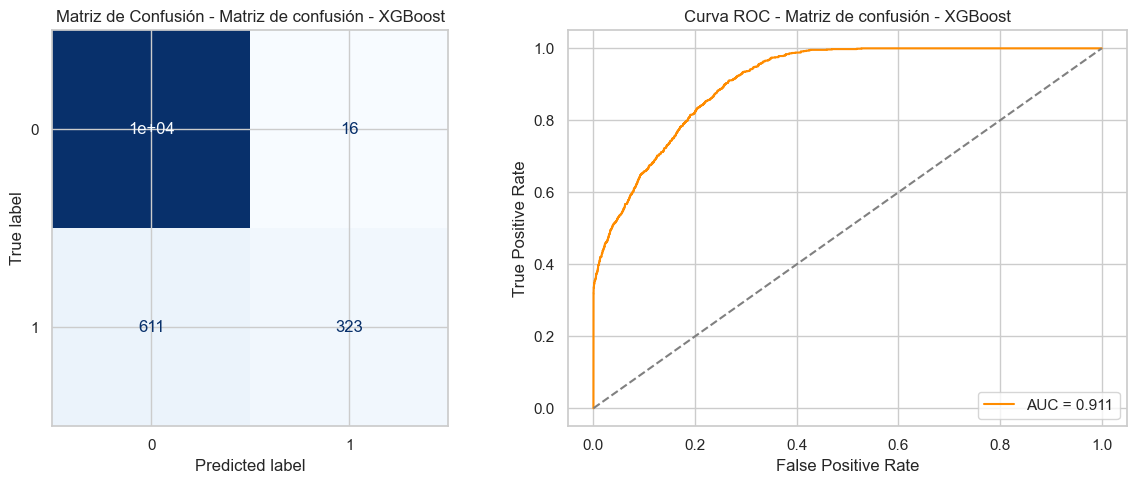

In [36]:
# =========================================================
# Comparación de modelos con Cross-Validation y matriz de confusión
# =========================================================

# Definimos los modelos candidatos a comparar
modelos = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    #"SVM": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=200,       # número de árboles
        learning_rate=0.1,      # tasa de aprendizaje
        max_depth=5,            # profundidad máxima de los árboles
        subsample=0.8,          # fracción de muestras usadas en cada árbol
        colsample_bytree=0.8,   # fracción de features en cada árbol
        random_state=42,
        use_label_encoder=False,
        eval_metric="logloss"
    )
}

# Definimos el scorer: F1 de la clase minoritaria (is_promoted = 1)
# Esto asegura que el modelo optimice su rendimiento para la clase de interés
f1_minority = make_scorer(f1_score, pos_label=1)

# Iteramos sobre cada modelo
for nombre, modelo in modelos.items():
    # Creamos un pipeline que incluye el preprocesamiento (scaling + onehot)
    # y el clasificador correspondiente
    pipe = Pipeline(steps=[
        ("potential_region", potential_region_transformer),
        ("preprocessor", preprocessor),
        ("model", modelo)
    ])
    
    print(X_train.columns)
    print(y_train.name)
    # Validación cruzada en el conjunto de entrenamiento (cv=5)
    # Usamos el F1-score de la clase minoritaria como métrica de evaluación
    cv_score = cross_val_score(pipe, X_train, y_train, cv=5, scoring=f1_minority)
    
    # Imprimimos el promedio y la desviación estándar de los resultados de CV
    print(f"{nombre}: {np.mean(cv_score):.4f} (+/- {np.std(cv_score):.4f})")
    
    # Reentrenamos el modelo en todo el conjunto de entrenamiento
    pipe.fit(X_train, y_train)
    
    # Graficamos la matriz de confusión en el conjunto de prueba (X_test)
    evaluar_modelo(pipe, X_test, y_test, nombre=f"Matriz de confusión - {nombre}")



## 5 OPtimización del modelo
### Optimización de XGBoost con GridSearchCV  

En esta sección se implementa un **proceso de búsqueda de hiperparámetros** para el modelo **XGBoost**, con el objetivo de optimizar su capacidad de detectar la clase minoritaria (`is_promoted = 1`). El enfoque principal está en **maximizar el Recall**, es decir, minimizar los falsos negativos.  

1. **Definición del modelo base**  
   - Se inicializa un `XGBClassifier` con parámetros básicos (`random_state`, `eval_metric="logloss"`) para garantizar reproducibilidad y estabilidad numérica.  

2. **Espacio de búsqueda de hiperparámetros (`param_grid`)**  
   - `n_estimators`: número de árboles en el ensamble.  
   - `max_depth`: controla la complejidad de cada árbol.  
   - `learning_rate`: regula cuánto aporta cada árbol nuevo al modelo.  
   - `subsample`: fracción de instancias usadas en cada iteración (controla overfitting).  
   - `colsample_bytree`: fracción de variables consideradas en cada árbol.  

3. **Pipeline con preprocesamiento**  
   - Se construye un `Pipeline` que integra el preprocesamiento (`preprocessor`) con el modelo `XGBoost`.  
   - Esto asegura que el escalado y la codificación de variables categóricas se apliquen dentro del flujo de validación cruzada, evitando fugas de información.  

4. **GridSearchCV**  
   - Se emplea `GridSearchCV` con validación cruzada de **5 folds**.  
   - La métrica de optimización es el **Recall de la clase positiva (`is_promoted = 1`)**, priorizando la detección de empleados que deberían ser promovidos.  
   - El proceso prueba todas las combinaciones de hiperparámetros del `param_grid`.  

5. **Entrenamiento y selección del mejor modelo**  
   - Se ejecuta la búsqueda con `grid_search.fit(X_train, y_train)`.  
   - Se imprime la **mejor combinación de hiperparámetros** y la puntuación asociada.  

6. **Evaluación final en el conjunto de prueba**  
   - El mejor modelo (`best_model`) se evalúa en `X_test` y `y_test` usando la función `evaluar_modelo`.  
   - Esta evaluación muestra métricas globales y por clase, además de la matriz de confusión y la curva ROC.  

 Con este procedimiento garantizamos que el modelo no solo aprenda a clasificar correctamente, sino que también **priorice reducir los falsos negativos**, lo cual es clave en problemas donde detectar correctamente a los promovidos es más importante que los no promovidos.


Fitting 3 folds for each of 108 candidates, totalling 324 fits


c:\Users\jlvar\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Users\jlvar\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:57:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Mejor combinación de hiperparámetros:
{'model__colsample_bytree': 0.8, 'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__subsample': 0.8}
Mejor F1 (clase 1): nan

🔎 Resultados para XGBoost Optimizado
📊 Reporte de clasificación:

                  precision    recall  f1-score   support

No promovido (0)       0.92      1.00      0.96     10028
   Promovido (1)       1.00      0.08      0.15       934

        accuracy                           0.92     10962
       macro avg       0.96      0.54      0.55     10962
    weighted avg       0.93      0.92      0.89     10962

ROC-AUC: 0.8547


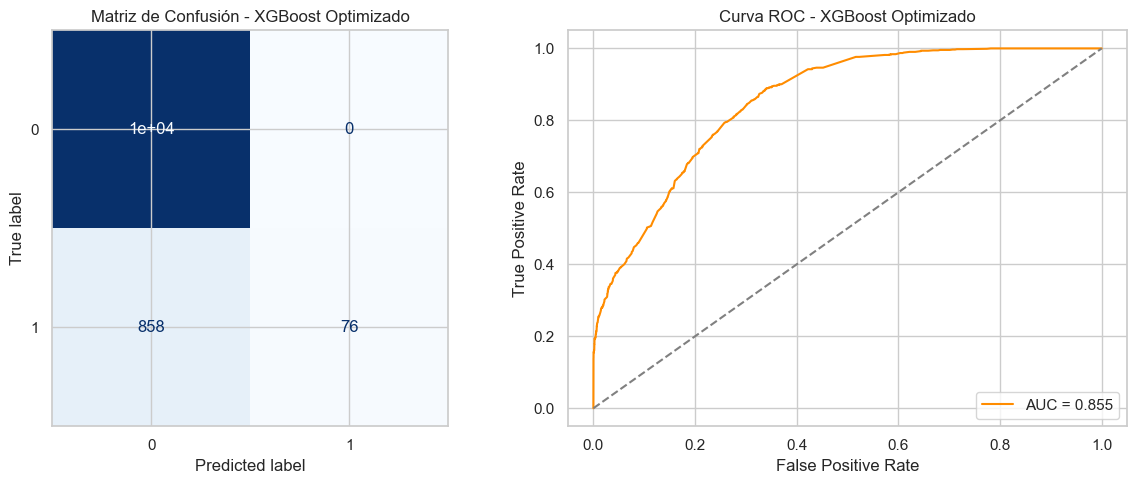

In [39]:
# =========================================================
# Definir modelo base
# =========================================================
xgb_clf = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

# =========================================================
# Definir espacio de búsqueda de hiperparámetros
# =========================================================
param_grid = {
    "model__n_estimators": [100, 200, 300],       # número de árboles
    "model__max_depth": [3, 5, 7],                # profundidad máxima
    "model__learning_rate": [0.01, 0.1, 0.2],     # tasa de aprendizaje
    "model__subsample": [0.8, 1.0],               # muestreo de filas
    "model__colsample_bytree": [0.8, 1.0]         # muestreo de columnas
}

# =========================================================
# Pipeline con preprocesamiento y modelo
# =========================================================
pipe_xgb = Pipeline(steps=[
    ("potential_region", potential_region_transformer),
    ("preprocessor", preprocessor),
    ("model", xgb_clf)
])

# =========================================================
# GridSearchCV
# =========================================================
grid_search = GridSearchCV(
    estimator=pipe_xgb,
    param_grid=param_grid,
    scoring=make_scorer(f1_minority, pos_label=1),
    cv=3,               # validación cruzada con 3 folds
    verbose=2,
    n_jobs=-1
)

# =========================================================
# Ejecutar búsqueda
# =========================================================
grid_search.fit(X_train, y_train)

# Resultados
print(" Mejor combinación de hiperparámetros:")
print(grid_search.best_params_)

print(f"Mejor F1 (clase 1): {grid_search.best_score_:.4f}")

# =========================================================
# Evaluación en el conjunto de prueba
# =========================================================
best_model = grid_search.best_estimator_
evaluar_modelo(best_model, X_test, y_test, nombre="XGBoost Optimizado")


### Ajuste del Umbral de Decisión  

Por defecto, los clasificadores asignan una instancia a la clase positiva (`Promovido = 1`) cuando la probabilidad predicha es **mayor o igual a 0.5**.  
Sin embargo, en problemas desbalanceados o donde es más importante reducir falsos negativos, este umbral puede ajustarse.  

1. **Probabilidades predichas**  
   - Se obtienen las probabilidades de pertenencia a la clase positiva (`is_promoted = 1`) con `predict_proba`.  
   - Solo se selecciona la segunda columna (`[:, 1]`), correspondiente a la clase positiva.  

2. **Definición de un nuevo umbral**  
   - Se establece un umbral alternativo (`umbral = 0.3`).  
   - Cualquier empleado con una probabilidad mayor o igual a 0.3 será clasificado como **Promovido (1)**, aunque no llegue al 50%.  

3. **Generación de predicciones ajustadas**  
   - Se compara cada probabilidad con el umbral y se convierte a `0` o `1`.  

4. **Evaluación de resultados**  
   - Se imprime la **matriz de confusión** y el **classification report** con las métricas principales (precision, recall, f1-score).  
   - Esto permite observar el impacto de reducir el umbral:  
     - **Aumenta el recall (menos falsos negativos)**.  
     - **Puede disminuir la precisión** (más falsos positivos).  

Este análisis es clave cuando el objetivo del negocio es **detectar al máximo posible de promovidos** aunque se cometan algunos errores adicionales en la predicción de no promovidos.


In [43]:
# =========================================================
# Probabilidades predichas
y_proba = best_model.predict_proba(X_test)[:, 1]

# Definir un nuevo umbral
umbral = 0.9
y_pred_umbral = (y_proba >= umbral).astype(int)

# Evaluar resultados
print(f"Resultados con umbral = {umbral}")
print(confusion_matrix(y_test, y_pred_umbral))
print(classification_report(y_test, y_pred_umbral, target_names=["No promovido", "Promovido"]))


Resultados con umbral = 0.9
[[10028     0]
 [  934     0]]
              precision    recall  f1-score   support

No promovido       0.91      1.00      0.96     10028
   Promovido       0.00      0.00      0.00       934

    accuracy                           0.91     10962
   macro avg       0.46      0.50      0.48     10962
weighted avg       0.84      0.91      0.87     10962



c:\Users\jlvar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jlvar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jlvar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 6- Predicciones para el conjunto de test

### Preparación del conjunto de prueba (`data_test`)  

Antes de realizar predicciones con el modelo final, es fundamental aplicar las **mismas transformaciones de manejo de valores faltantes** que se usaron en el conjunto de entrenamiento.  

1. **Reemplazo en `education`**  
   - Los valores nulos en la variable categórica `education` se sustituyen por la categoría `"Unknown"`.  
   - Esto permite que el modelo trate la ausencia de información como una categoría válida y consistente.  

2. **Imputación en variables numéricas**  
   - Se seleccionan todas las columnas numéricas del conjunto de prueba.  
   - Se aplica un `KNNImputer` (con *k=5 vecinos*), igual que en el entrenamiento, para completar los valores faltantes en `previous_year_rating` y cualquier otra numérica con datos ausentes.  
   - El resultado imputado se reconstruye en un DataFrame con las mismas columnas y reemplaza las originales en `data_test`.  

3. **Predicciones finales**  
   - Una vez que los datos de prueba quedan libres de nulos y con el mismo formato que los de entrenamiento, se pasan al **modelo final entrenado (`best_model`)**.  
   - Se generan las predicciones en `y_test_pred`, que indican qué empleados serían promovidos según el modelo.  

Con este flujo aseguramos que el preprocesamiento aplicado en entrenamiento se replica en prueba, evitando inconsistencias y fugas de información.  


In [ ]:
# =========================================================
# Preprocesamiento de data_test antes de predecir
# =========================================================

# 1. Manejo de valores faltantes en variables categóricas
#    En la columna 'education', los valores nulos se reemplazan por la categoría "Unknown"
#    Esto permite que el modelo trate la ausencia de información como una categoría válida.
data_test["education"] = data_test["education"].fillna("Unknown")

# 2. Selección de variables numéricas en el conjunto de prueba
#    Se extraen únicamente las columnas de tipo int o float, que serán imputadas.
data_test_num = data_test.select_dtypes(include=["int64", "float64"])

# 3. Imputación de valores faltantes en variables numéricas
#    Usamos un KNNImputer con k=5 vecinos (igual que en entrenamiento).
#    Esto completa los valores nulos estimando su valor en función de vecinos similares.
imputer = KNNImputer(n_neighbors=5)
data_test_num_imputed = imputer.fit_transform(data_test_num)

# 4. Reconstrucción del DataFrame imputado
#    Volvemos a convertir el resultado a un DataFrame y restauramos los nombres de columnas originales.
data_test_num = pd.DataFrame(data_test_num_imputed, columns=data_test_num.columns)

# 5. Sustitución en el dataset original
#    Reemplazamos las columnas numéricas en 'data_test' con sus versiones imputadas.
data_test[data_test_num.columns] = data_test_num

# 6. Generación de predicciones
#    Usamos el modelo entrenado y optimizado (best_model) para predecir la probabilidad
#    de promoción en cada registro del conjunto de prueba.
y_test_pred = best_model.predict(data_test)



### Creación del dataset de predicciones  

En esta sección se genera un nuevo DataFrame llamado **`predicciones`**, que combina:  

- El dataset original de prueba (`data_test`).  
- Una nueva columna **`pred_is_promoted`** con las predicciones del modelo.  

De esta manera, se obtiene un dataset enriquecido que permite analizar los resultados del modelo junto con las características originales de cada empleado.  


In [ ]:
# =========================================================
# Crear dataset de predicciones
# =========================================================

# Convertir y_test_pred en DataFrame con nombre de columna
pred_col = pd.DataFrame(y_test_pred, columns=["pred_is_promoted"])

# Concatenar data_test con las predicciones
predicciones = pd.concat([data_test.reset_index(drop=True), pred_col], axis=1)

# Mostrar las primeras filas
predicciones.head()


## Reflexión Final y Consideraciones Éticas  

Uno de los principales desafíos de este proyecto fue trabajar con un dataset desbalanceado, donde los casos de empleados promovidos representan una minoría frente al total.  
Esto obligó a elegir cuidadosamente la métrica de evaluación, ya que un modelo con alta accuracy podría fallar en lo más importante: detectar correctamente a quienes realmente merecen una promoción.  

En este sentido:  
- Si la prioridad es no dejar pasar a candidatos valiosos, debemos optimizar Recall (minimizar falsos negativos).  
- Si queremos un equilibrio, el F1-score de la clase minoritaria puede ser más apropiado.  
- Además, es crucial considerar el costo organizacional de los errores: un falso positivo (promover sin mérito) no tiene el mismo impacto que un falso negativo (ignorar a alguien que lo merecía).  

###  Consideraciones Éticas  

El uso de modelos de machine learning en procesos de promoción laboral debe manejarse con extrema responsabilidad:  

1. **Transparencia y explicabilidad**:  
   Los empleados deben comprender, al menos de manera general, cómo se toman las decisiones. Un modelo de “caja negra” puede generar desconfianza y tensiones en la organización.  

2. **No reemplazar al juicio humano**:  
   El modelo debe ser un apoyo en la toma de decisiones, no un reemplazo. Las evaluaciones cualitativas y el contexto de cada colaborador siguen siendo insustituibles.  

3. **Evitar sesgos históricos**:  
   Si los datos reflejan desigualdades de género, región, edad u otros factores, el modelo podría perpetuarlas. Es fundamental auditar el sesgo y aplicar correcciones cuando sea necesario.  

4. **Impacto en la equidad**:  
   Decidir quién asciende tiene consecuencias directas en la motivación, retención y percepción de justicia dentro de la empresa. El uso ético de estas herramientas debe poner siempre en primer plano el bienestar de las personas.  


Los modelos predictivos en RRHH pueden ser aliados poderosos para mejorar la eficiencia y anticipar candidatos con alto potencial. Sin embargo, solo generan valor si se aplican bajo principios de **transparencia, equidad y responsabilidad ética**.  
En última instancia, la decisión final debe ser humana, apoyada pero nunca sustituida por el algoritmo.  
